In [1]:
import pickle
import networkx as nx
import numpy as np
import pandas as pd

from scipy import stats
from itertools import chain
import statsmodels.api as sm
import pylab as py

import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
file = open('NetSense_network.pkl', 'rb')
# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

Showing the pickled data:
The data  0  is :  1
The data  1  is :  2
The data  2  is :  3
The data  3  is :  4
The data  4  is :  5
The data  5  is :  6


In [3]:
data[6].nodes[75261]['hometown_1']

1

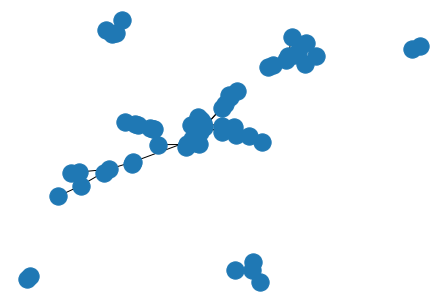

In [4]:
nx.draw(data[6])

In [5]:
data[1].nodes.data()

NodeDataView({75178: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 2, 'premaritalsex_': 3, 'euthanasia_': 3, 'deathpen_': 3, 'gaymarriage_': 3, 'marijuana_': 2, 'political_': 1, 'abortion_': 3, 'homosexual_': 3}, 30952: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 2, 'premaritalsex_': 2, 'euthanasia_': 2, 'deathpen_': 2, 'gaymarriage_': 1, 'marijuana_': 3, 'political_': 1, 'abortion_': 2, 'homosexual_': 2}, 13116: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 3, 'deathpen_': 3, 'gaymarriage_': 3, 'marijuana_': 3, 'political_': 3, 'abortion_': 3, 'homosexual_': 1}, 62555: {'age_1': 2, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 1, 'deathpen_': 1, 'gaymarriage_': 3, 'marijuana_': 2, 'political_': 3, 'abortion_': 3, 'homosexual_': 3}, 26999: {'age_1': 2, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 1, 'deathpen_': 2, 'gaymarri

In [6]:
#creating list of attributes
list_of_attributes = set([k for n in data[1].nodes for k in data[1].nodes[n].keys()])

#creating possible attribute values
attribute_values = dict((attribute, set() ) for attribute in list_of_attributes)

for sem in range(1,7):
    for node in data[sem].nodes():
        for attribute in list_of_attributes:
            attribute_values[attribute].add(data[sem].nodes[node][attribute])

attribute_values

#To apply PCA or other analysis on all attributes (i.e. including ethnicity) 
#one would have to create an attribute for each race, that is is_1, is_2 etc. 
#Because this attribute is not ordered. 

{'ethnicity_1': {1, 2, 3, 4},
 'deathpen_': {1, 2, 3},
 'marijuana_': {1, 2, 3},
 'political_': {1, 2, 3},
 'hometown_1': {1, 2, 3},
 'homosexual_': {1, 2, 3},
 'premaritalsex_': {1, 2, 3},
 'age_1': {1, 2},
 'euthanasia_': {1, 2, 3},
 'abortion_': {1, 2, 3},
 'gender_1': {1, 2},
 'gaymarriage_': {1, 2, 3}}

In [7]:
#creating table of attribute values
attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    attributes[i] = np.zeros([len(data[i].nodes), len(list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(list_of_attributes):
            attributes[sem][i,j] = data[sem].nodes[node][attribute]

In [8]:
attributes

{1: array([[2., 3., 2., ..., 3., 2., 3.],
        [2., 2., 3., ..., 2., 2., 1.],
        [2., 3., 3., ..., 3., 1., 3.],
        ...,
        [4., 2., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 2., 2.],
        [1., 1., 3., ..., 3., 1., 3.]]),
 2: array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 2., 1.],
        [1., 2., 1., ..., 1., 2., 3.],
        ...,
        [1., 2., 1., ..., 1., 2., 3.],
        [1., 3., 1., ..., 1., 1., 3.],
        [3., 1., 1., ..., 2., 2., 3.]]),
 3: array([[1., 1., 1., 2., 2., 3., 3., 1., 3., 3., 2., 3.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.],
        [1., 1., 3., 2., 2., 1., 1., 2., 1., 1., 2., 2.],
        [3., 3., 3., 3., 1., 3., 3., 1., 3., 1., 2., 3.],
        [1., 1., 2., 1., 1., 3., 3., 2., 3., 3., 1., 3.],
        [2., 1., 1., 2., 1., 1., 1., 1., 3., 3., 2., 3.],
        [1., 1., 2., 1., 2., 3., 3., 1., 2., 1., 1., 3.],
        [1., 1., 1., 3., 2., 3., 3., 2., 2., 3., 2., 3.],
        [1., 1., 1., 1., 1., 

In [9]:
import mca


In [10]:
df = pd.DataFrame(data=attributes[1], columns=attribute_values)
print(df)

    ethnicity_1  deathpen_  marijuana_  political_  hometown_1  homosexual_  \
0           2.0        3.0         2.0         1.0         1.0          3.0   
1           2.0        2.0         3.0         1.0         1.0          2.0   
2           2.0        3.0         3.0         3.0         1.0          1.0   
3           2.0        1.0         2.0         3.0         1.0          3.0   
4           2.0        2.0         1.0         2.0         1.0          3.0   
..          ...        ...         ...         ...         ...          ...   
93          1.0        3.0         1.0         1.0         2.0          1.0   
94          2.0        3.0         3.0         3.0         1.0          3.0   
95          4.0        2.0         1.0         2.0         1.0          1.0   
96          1.0        1.0         1.0         1.0         3.0          1.0   
97          1.0        1.0         3.0         2.0         1.0          3.0   

    premaritalsex_  age_1  euthanasia_  abortion_  

In [11]:
mca_counts = mca.MCA(df, ncols = len(attribute_values))
# print(mca_counts.fs_r(1))
print(mca_counts.L)

[0 0 0 0 0 0 0 0 0 0 0 0]


# PCA
Trying simple PCA, although it is not recommended. To do it we need to remove categorical data first. 

In [23]:

ord_list_of_attributes = list_of_attributes - {'ethnicity_1', 'gender_1', 'hometown_1', 'age_1'}
print(ord_list_of_attributes)

#creating table of attribute values
ord_attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    ord_attributes[i] = np.zeros([len(data[i].nodes), len(ord_list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(ord_list_of_attributes):
            ord_attributes[sem][i,j] = data[sem].nodes[node][attribute]
print(ord_attributes)

{'marijuana_', 'deathpen_', 'political_', 'homosexual_', 'premaritalsex_', 'euthanasia_', 'abortion_', 'gaymarriage_'}
{1: array([[2., 3., 1., 3., 3., 3., 3., 3.],
       [3., 2., 1., 2., 2., 2., 2., 1.],
       [3., 3., 3., 1., 3., 3., 3., 3.],
       [2., 1., 3., 3., 3., 1., 3., 3.],
       [1., 2., 2., 3., 3., 1., 3., 2.],
       [1., 1., 2., 1., 1., 3., 1., 1.],
       [1., 2., 1., 2., 1., 1., 1., 2.],
       [3., 2., 2., 1., 1., 2., 2., 2.],
       [2., 1., 2., 3., 3., 3., 3., 3.],
       [3., 1., 3., 3., 3., 1., 1., 3.],
       [2., 1., 2., 1., 1., 3., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 2.],
       [3., 1., 1., 3., 3., 2., 1., 3.],
       [3., 1., 1., 2., 1., 1., 1., 1.],
       [3., 3., 3., 3., 3., 3., 1., 3.],
       [2., 1., 1., 2., 2., 3., 1., 1.],
       [2., 2., 1., 1., 3., 2., 1., 1.],
       [3., 3., 1., 1., 1., 3., 1., 1.],
       [3., 2., 3., 3., 2., 3., 3., 3.],
       [3., 1., 1., 1., 3., 3., 1., 3.],
       [3., 3., 1., 3., 3., 3., 3., 3.],
       [3., 1., 

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(ord_attributes[1])
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.47  0.119 0.102 0.09  0.071 0.064 0.052 0.031]
[17.116  8.624  7.989  7.469  6.658  6.332  5.67   4.396]


In [25]:
pca.components_

array([[-0.271, -0.13 , -0.324, -0.484, -0.418, -0.25 , -0.417, -0.399],
       [-0.221,  0.653, -0.437, -0.092,  0.237,  0.468,  0.07 , -0.21 ],
       [ 0.779, -0.074,  0.104, -0.285, -0.057,  0.425, -0.136, -0.305],
       [-0.162, -0.528, -0.376,  0.177, -0.081,  0.578, -0.245,  0.35 ],
       [-0.209, -0.083,  0.179, -0.106, -0.585,  0.298,  0.677, -0.131],
       [-0.416, -0.318,  0.476, -0.16 ,  0.499,  0.237, -0.07 , -0.405],
       [ 0.162, -0.375, -0.51 ,  0.273,  0.256, -0.222,  0.411, -0.464],
       [ 0.046, -0.154, -0.183, -0.73 ,  0.321, -0.097,  0.333,  0.429]])

# Checking correlation for PCA transformed variables

In [26]:
dcor_attributes = dict((i, 0) for i in range(1,7))

dcor_attributes = dict((j, np.array([np.sum(pca.components_*ord_attributes[j][i],1) for i in range(0,len(ord_attributes[j]))])) for j in range(1,7))

In [27]:
def get_transformed_attributes(agents, pca_comp = pca.components_):
    agents = np.array(agents)
#     if not hasattr(agents,  "__len__"):
#         agents = [agents]
    one_ag = False
    if hasattr(agents,  "shape"):
        if len(agents.shape) == 1:
            agents = [agents]
            one_ag = True
    
    transf = np.array([np.sum(pca.components_*agents[i],1) for i in range(0,len(agents))])
    
    if one_ag:
        transf = transf[0]
    return transf

In [28]:
get_transformed_attributes(np.ones(8))

array([-2.693,  0.469,  0.449, -0.285,  0.041, -0.156, -0.469, -0.035])

In [29]:
dcor_attributes[1].shape, get_transformed_attributes(dcor_attributes[1])

((98, 8),
 array([[ 1.876e+00,  2.495e+00, -6.157e+00, -6.553e-01,  6.625e-01,
          2.041e+00, -2.375e+00, -8.219e-01],
        [ 1.191e+00,  8.807e-01, -3.821e+00, -1.343e+00,  1.362e+00,
          2.442e+00, -2.121e+00, -2.928e-01],
        [ 1.857e+00,  1.472e+00, -5.341e+00,  2.158e-01,  8.628e-02,
          3.274e+00, -4.369e+00,  1.469e-02],
        [ 2.448e+00,  1.216e+00, -5.236e+00,  1.662e+00,  1.375e+00,
          3.048e+00, -1.427e+00,  3.611e-01],
        [ 2.349e+00,  2.490e+00, -4.563e+00,  6.489e-01,  1.304e+00,
          2.145e+00, -1.218e+00,  5.100e-01],
        [ 3.515e-01,  1.304e+00, -2.196e+00,  2.155e-01, -2.956e-01,
          2.603e+00, -1.871e+00, -1.394e+00],
        [ 2.109e+00,  9.538e-01, -3.023e+00, -2.989e-01, -8.548e-02,
          1.107e+00, -9.139e-01, -5.913e-01],
        [ 1.383e+00,  7.928e-02, -3.724e+00, -6.461e-01, -1.860e-01,
          2.852e+00, -2.574e+00, -5.551e-02],
        [ 1.137e+00,  1.791e+00, -5.865e+00,  9.015e-01,  1.071e+00,
 

In [30]:
names = list()
for j, attribute in enumerate(ord_list_of_attributes):
#     print(attribute)
    names.append(attribute[0:-1])

indexes = np.argsort(names)
indexes

array([6, 1, 5, 7, 3, 0, 2, 4])

In [31]:
spr_cor, spr_pv = stats.spearmanr(dcor_attributes[1][:, indexes], axis=0)

In [32]:
np.set_printoptions(precision=3)
print(spr_cor)
print(spr_pv)

[[ 1.    -0.02  -0.04   0.136  0.022  0.005  0.073 -0.079]
 [-0.02   1.     0.058 -0.021  0.039 -0.032 -0.042  0.013]
 [-0.04   0.058  1.    -0.003  0.033 -0.07  -0.019  0.115]
 [ 0.136 -0.021 -0.003  1.    -0.006 -0.057 -0.047 -0.045]
 [ 0.022  0.039  0.033 -0.006  1.     0.036 -0.004  0.042]
 [ 0.005 -0.032 -0.07  -0.057  0.036  1.    -0.089 -0.048]
 [ 0.073 -0.042 -0.019 -0.047 -0.004 -0.089  1.     0.037]
 [-0.079  0.013  0.115 -0.045  0.042 -0.048  0.037  1.   ]]
[[0.    0.847 0.693 0.183 0.829 0.959 0.472 0.441]
 [0.847 0.    0.568 0.839 0.707 0.751 0.682 0.9  ]
 [0.693 0.568 0.    0.975 0.749 0.491 0.852 0.26 ]
 [0.183 0.839 0.975 0.    0.955 0.577 0.645 0.659]
 [0.829 0.707 0.749 0.955 0.    0.727 0.967 0.68 ]
 [0.959 0.751 0.491 0.577 0.727 0.    0.385 0.636]
 [0.472 0.682 0.852 0.645 0.967 0.385 0.    0.717]
 [0.441 0.9   0.26  0.659 0.68  0.636 0.717 0.   ]]


In [33]:
np.savetxt("sp_op_all_pairs_pca.csv", spr_cor)

Using PCA variables show that they are decorrelated. So maybe we can use them to calculate polarities, triads etc. 
But as to calc each new attribute we get all old attributes with certain coefficients, won't the distance just be sum of coefficients for given old attribute times this attribute value?

## Max difference of new attributes

In [34]:
max_dif = abs(np.sum([3,3,3,3,3,3,3,3] * pca.components_[0]) - np.sum(np.ones(8) * pca.components_[0]))/8
min_dif = 0
max_dif

0.6731593640729359

In [35]:
max_difs = [(np.sum(np.ones(8)*3 * pca.components_[i]) - np.sum(np.ones(8) * pca.components_[i]))/8 for i in range(0, len(pca.components_))]
max_difs

[-0.6731593640729359,
 0.1171682874027372,
 0.11214982538572432,
 -0.07132349966753418,
 0.010223005331998925,
 -0.03907328540479906,
 -0.11729119229619517,
 -0.008659260277375583]

In [36]:
sum(np.abs(max_difs))

1.1490477198393005

In [46]:
max_difs2 = [(np.sum(np.abs(np.ones(8)*3 * pca.components_[i])) - np.sum(np.abs(np.ones(8) * pca.components_[i])))/8 for i in range(0, len(pca.components_))]
max_difs2, sum(max_difs2)

([0.6731593640729359,
  0.5973368021543243,
  0.5415389513500883,
  0.623903212979862,
  0.5668296735029926,
  0.6450725898637426,
  0.6680632035555414,
  0.5734216963252282],
 4.889325493804716)

In [47]:
def calc_distance(agent1, agent2, scale = 1):
    return np.sum(np.abs(agent1-agent2)) / len(agent1) / scale

def calc_distances(agents, scale = 1):
    N, A = agents.shape
    
    distances = np.zeros([N,N])
    
    for i in range(0,N):
        for j in range(i+1,N):
            distances[i,j] = calc_distance(agents[i], agents[j], scale)
            distances[j,i] = distances[i,j]
    return distances


In [48]:
import itertools

vals = [1, 3]

max_dif3 = 0
max_vals = []

repeat = 8

# agents2 = [np.ones(repeat)]
# agents2 = get_transformed_attributes(agents2)
for agent1 in itertools.product(vals, repeat = repeat):
    tr_agent1 = get_transformed_attributes(agent1)
#     for agent2 in agents2: 
    for agent2 in itertools.product(vals, repeat = repeat):
        tr_agent2 = get_transformed_attributes(agent2)
        dif = calc_distance(tr_agent1, tr_agent2)
        
        if dif > max_dif3:
            max_dif3 = dif
            max_vals = [agent1, agent2]
max_dif3, max_vals

(1.9498109791002056, [(1, 3, 1, 3, 1, 1, 3, 1), (3, 1, 3, 1, 3, 3, 1, 3)])

In [49]:
# def calc_max_dif()

In [50]:
calc_distance(get_transformed_attributes(np.ones(8)*3), get_transformed_attributes(np.ones(8)))

1.1490477198393003

In [51]:
get_transformed_attributes(agent1), agent1, get_transformed_attributes(max_vals[0])

(array([-8.078,  1.406,  1.346, -0.856,  0.123, -0.469, -1.407, -0.104]),
 (3, 3, 3, 3, 3, 3, 3, 3),
 array([-4.755,  1.733, -0.543, -1.475,  1.018, -1.252,  0.149, -1.136]))

In [52]:
sum(pca.components_[0]*2)/8, len(get_transformed_attributes(np.ones(8)*3))

(-0.6731593640729359, 8)

Text(0, 0.5, 'Density')

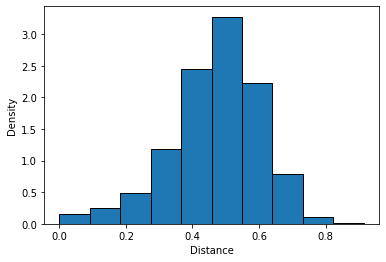

In [53]:
dists = calc_distances(dcor_attributes[1], max_dif3)

plt.hist(dists.flatten(), density=True, edgecolor='black')
plt.xlabel("Distance")
plt.ylabel("Density")

# plt.savefig("dd_pca.pdf",dpi=600,bbox_inches='tight',format='pdf')

In [ ]:
np.where(np.max(dists) == dists), np.max(dists)

In [ ]:
transf_max_vals = get_transformed_attributes(max_vals)
calc_distance(transf_max_vals[0], transf_max_vals[1])

In [ ]:
transf_max_vals, max_vals

In [ ]:
ord_attributes[1][[53,79,94]], ord_list_of_attributes

In [ ]:
(dists <= 0.5)*2-1-np.eye(dists.shape[0])

In [41]:
def calc_link_polarity2(agent1, agent2, th, attr_dif = max_dif3):
    return calc_distance(agent1, agent2, attr_dif) <= th

def calc_link_polarities2(agents, th, attr_dif = max_dif3):
    N, A = agents.shape
    
    polarities = (calc_distances(agents, attr_dif) <= th)*2 - 1 - np.eye(N)
    
    return polarities

def balanced_triad_density(polarities):
    N = polarities.shape[0]
    return (np.sum(np.matmul(polarities,polarities) * polarities) / 6 / (N*(N-1)*(N-2)/6) + 1)/2

In [33]:
polarities = calc_link_polarities2(dcor_attributes[1], 0.5)
pol2 = calc_link_polarities2(ord_attributes[1], 0.5, 2)
balanced_triad_density(polarities), balanced_triad_density(pol2)

/tmp/ipykernel_12454/906345293.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sum(np.abs(agent1-agent2)) / len(agent1) / scale
/tmp/ipykernel_12454/906345293.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(np.abs(agent1-agent2)) / len(agent1) / scale


(0.0, 0.7293682937092363)

In [42]:
def balanced_triad_density_network(polarities, triads):
    T = len(triads)
    dens = 0.
    for triad in triads:
        i, j, k = triad
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            dens = dens + 1
    dens = dens / T
    return dens

def get_triads_polarity(polarities, triads):
    Ts = len(triads)
    
    t_pol = np.zeros(Ts) 
    t_pol_type = np.zeros(Ts)
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        pols = [polarities[i,j], polarities[i,k], polarities[k,j]]
        
        t_pol_type[t] = 3-(sum(pols)+3)/2
        
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            t_pol[t] = 1
        else:
            t_pol[t] = -1
    
    return t_pol, t_pol_type

def count_triads_types(polarities, triads):
    t_pol, t_pol_type = get_triads_polarity(polarities, triads)
    
    t2 = np.array(t_pol_type)
    triads_type = [sum(t2 == i) for i in range(0,4)]
    
    return triads_type


In [43]:
def get_triads(net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]

    triads = []

    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                for k in range(j+1,N):
                    if A[i,k] > 0 and A[j,k] > 0:
                        triads.append((i,j,k))
    
    return triads

def get_triads_strength(triads, net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]
    Ts = len(triads)
    
    s_mul = np.zeros(Ts) #multiplicative strength
    s_add = np.zeros(Ts) #additive strength
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        s_mul[t] = A[i,j] * A[i,k] * A[j,k]
        s_add[t] = A[i,j] + A[i,k] + A[j,k]
    
    return s_mul, s_add

In [44]:
sem = 1
triads = get_triads(data[sem])

polarities = calc_link_polarities2(dcor_attributes[sem], 0.1)

balanced_triad_density_network(polarities, triads), balanced_triad_density(polarities)

NameError: name 'calc_distances' is not defined

In [37]:
sem = 2
triads = get_triads(data[sem])

thetas = np.linspace(0,1,101)

bals = np.zeros(len(thetas))
all_bals = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    polarities = calc_link_polarities2(dcor_attributes[sem], theta)
    bals[i] = balanced_triad_density_network(polarities, triads)
    all_bals[i] = balanced_triad_density(polarities)


/tmp/ipykernel_12454/906345293.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sum(np.abs(agent1-agent2)) / len(agent1) / scale
/tmp/ipykernel_12454/906345293.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(np.abs(agent1-agent2)) / len(agent1) / scale


Text(0, 0.5, 'density of balanced triads')

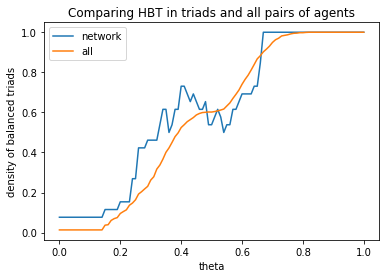

In [43]:
plt.plot(thetas, bals, thetas, all_bals)
plt.legend(["network", "all"])
plt.title("Comparing HBT in triads and all pairs of agents")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

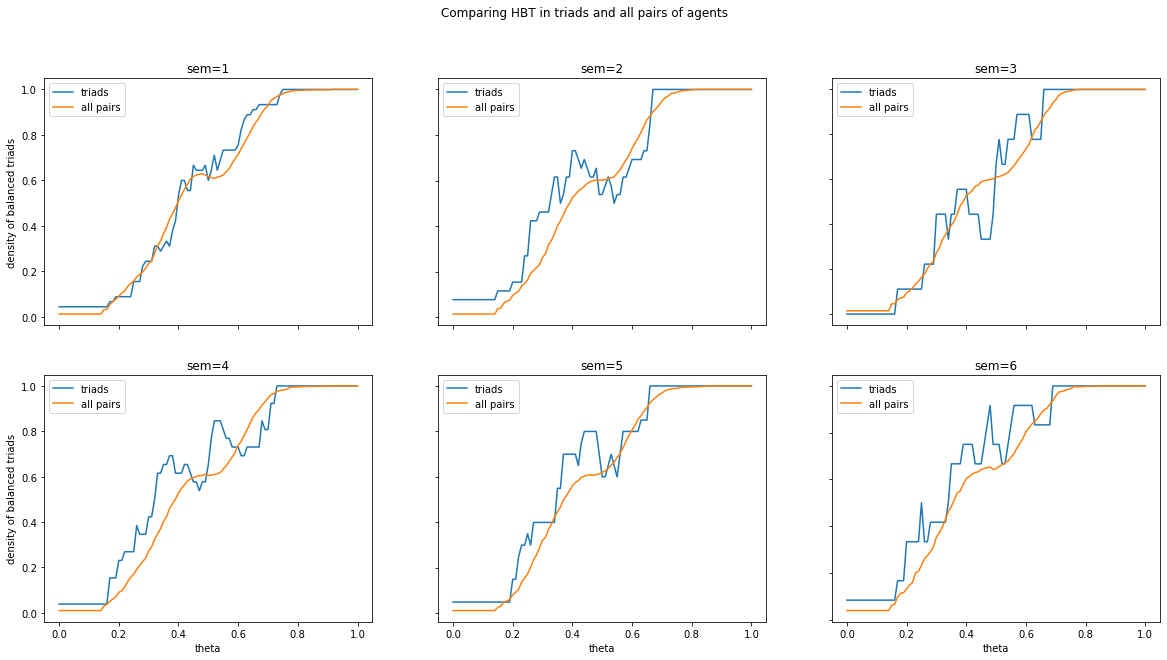

In [60]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,101)

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing HBT in triads and all pairs of agents")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        triads = get_triads(data[semm])
        
        all_bals = np.zeros(len(thetas))
        bals = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(dcor_attributes[semm], theta)
            bals[i] = balanced_triad_density_network(polarities, triads)
            all_bals[i] = balanced_triad_density(polarities)
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, thetas, all_bals)
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].legend(["triads", "all pairs"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Text(0, 0.5, 'density of balanced triads')

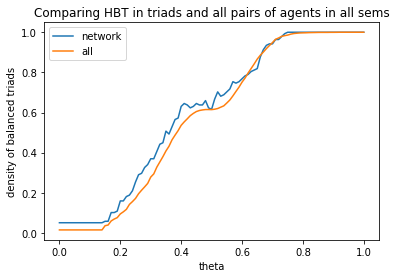

In [199]:
first_sem = 1
last_sem = 6
thetas = np.linspace(0,1,101)

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

agents_len = [len(dcor_attributes[semm]) for semm in range(1,last_sem+1)]
net_all_num = np.sum([N*(N-1)/2 for N in agents_len[first_sem-1:last_sem]])

all_bals = np.zeros(len(thetas))
bals = np.zeros(len(thetas))

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    N = agents_len[semm-1]
            
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(dcor_attributes[semm], theta)
        bals[i] = bals[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
        
        all_bals[i] = all_bals[i] + balanced_triad_density(polarities) * N*(N-1)/2

bals = bals / triads_all_num
all_bals = all_bals / net_all_num

plt.plot(thetas, bals, thetas, all_bals)
plt.legend(["network", "all"])
plt.title("Comparing HBT in triads and all pairs of agents in all sems")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [195]:

agents_len = [len(dcor_attributes[semm]) for semm in range(1,last_sem+1)]
triads_all_num = np.sum([N*(N-1)/2 for N in agents_len[first_sem-1:last_sem]])
triads_all_num, agents_len, 80*80/2*5

(15633.0, [98, 89, 68, 89, 85, 63], 16000.0)

# Test whether density of balanced triads is above average

One could take pairs of true balanced_density_in_triads and (e.g.) balanced_density_in_the_whole_network for different thetas and and check (Kruskal-Wallis) whether the value of balanced_density in these pairs is bigger for triads. 

The question above is whether this is a valid approach. 

I think about using similar approach is that maybe we cannot tell for a given threshold for all semesters that HBT is observable. Also we shouldn't use Holme-Bonferroni for a given semester (or alltogether here), because different tests are correlated. (imagine that for theta1 we have p_val = 0.01 and we can suppose that for values of theta close to theta1 it is still the same.)

So my idea is that maybe looking at the whole curve we could tell that the curve for real data lies above (e.g. random) other data and that's why HBT is obervable. 

One idea is to use simple sign tes, that is for each pair get the result true_dens > rand_dens. 
But in all those tests (also in K-W) I have a problem with the resolution of pairs given? Maybe we should randomly generate M thetas from uniform random distribution and then get pairs. Then the problem could be with the range with theta close to 1, as we can see the curves do not differ too much, but then we could just remove such values or generate thetas from 0 to e.g. 0.8. 

Before doing above, I want to check the following. Let's randomize attributes and see how for such randomized attributes the density of balanced triads changes with theta. 

Text(0, 0.5, 'density of balanced triads')

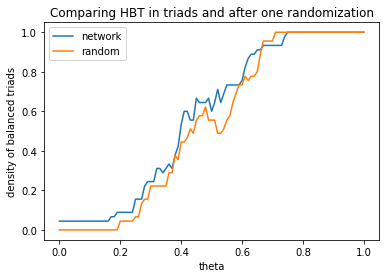

In [120]:
sem = 1
thetas = np.linspace(0,1,101)

triads = get_triads(data[sem])

bal_dens = np.zeros(len(thetas))
bal_dens_rands = np.zeros(len(thetas))

agents_rand = randomize_all_attributes(dcor_attributes[sem])

for i, theta in enumerate(thetas):
    polarities = calc_link_polarities2(dcor_attributes[sem], theta)
    bal_dens[i] = balanced_triad_density_network(polarities, triads)
    
    polarities_rand = calc_link_polarities2(agents_rand, theta)
    bal_dens_rands[i] = balanced_triad_density_network(polarities_rand, triads)

plt.plot(thetas, bal_dens, thetas, bal_dens_rands)
plt.legend(["network", "random"])
plt.title("Comparing HBT in triads and after one randomization")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [106]:
np.sum(bal_dens), np.sum(bal_dens_rands)

(66.5, 59.83333333333333)

In [105]:
[len(get_triads(data[sem])) for sem in range(1,7)]

[45, 26, 9, 26, 20, 12]

Spróbujmy policzyć proste pola pod krzywą i porównajmy przed i po randomizacji. 

In [204]:
sem = 6
thetas = np.linspace(0,1,101)
M = 100

triads = get_triads(data[sem])

bal_dens = np.zeros(len(thetas))

for i, theta in enumerate(thetas):
    polarities = calc_link_polarities2(dcor_attributes[sem], theta)
    bal_dens[i] = balanced_triad_density_network(polarities, triads)
    
bal_dens_sum = np.sum(bal_dens)

bal_dens_rands_sum = np.zeros(M)

for j in range(0,M):
    bal_dens_rands = np.zeros(len(thetas))
    agents_rand = randomize_all_attributes(dcor_attributes[sem])

    for i, theta in enumerate(thetas):    
        polarities_rand = calc_link_polarities2(agents_rand, theta)
        bal_dens_rands[i] = balanced_triad_density_network(polarities_rand, triads)
    
    bal_dens_rands_sum[j] = np.sum(bal_dens_rands)

bal_dens_sum, bal_dens_rands_sum

(66.5,
 array([65.833, 53.25 , 55.25 , 57.333, 69.5  , 66.583, 63.667, 60.917,
        55.667, 61.25 , 64.583, 62.083, 60.25 , 59.167, 64.167, 58.167,
        55.667, 65.667, 64.167, 60.75 , 54.583, 56.417, 65.833, 62.75 ,
        66.917, 61.917, 61.833, 58.25 , 61.583, 63.417, 60.583, 56.167,
        61.083, 58.833, 54.5  , 62.917, 61.5  , 65.25 , 60.917, 62.417,
        74.583, 60.583, 55.083, 64.333, 58.667, 59.583, 62.25 , 54.583,
        55.667, 66.417, 59.417, 60.75 , 52.25 , 60.75 , 65.25 , 65.167,
        56.583, 53.   , 58.333, 54.417, 64.583, 62.417, 57.667, 58.917,
        65.333, 60.167, 63.333, 56.833, 64.5  , 63.583, 68.5  , 59.583,
        60.5  , 54.583, 61.417, 60.5  , 56.5  , 61.25 , 59.917, 57.667,
        56.333, 59.75 , 56.167, 57.167, 61.75 , 67.583, 67.083, 59.667,
        63.   , 65.083, 66.417, 56.083, 60.417, 66.667, 56.333, 60.167,
        59.917, 53.75 , 53.083, 66.083]))

In [205]:
np.sum(bal_dens_sum > bal_dens_rands_sum), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(92, 92)

In [94]:
first_sem = 1
last_sem = 6
thetas = np.linspace(0,1,101)
M = 100
disp_every = 0.2
generate_true_densities = False
saved = False

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time, ". Started analysis")

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len)

bal_dens = np.zeros(len(thetas))

bal_dens_rands_sum = np.zeros(M)
attr_rands_M = [randomize_attribute_sets(dcor_attributes) for i in range(0,M)] 

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time, ". Finished randomization of attributes. ")

if generate_true_densities:
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]

        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(dcor_attributes[semm], theta)
            bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
        
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print(current_time, ". Finished calculating real-world balanced densities. ")
    
bal_dens_rands = np.zeros([M, len(thetas)])
disp_every_printer = disp_every
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = calc_link_polarities2(attr_rands_M[j][semm], theta)
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
    if (j+1) / M >= disp_every_printer:
        now = datetime.now()

        current_time = now.strftime("%H:%M:%S")
        print(current_time, ". Finished ", str(int((j+1)/M*100)), "% of randomized calculations.")
        disp_every_printer += disp_every

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print(current_time, ". Finished.")

bal_dens_sum = np.sum(bal_dens)

bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

test_all_agents_terms_together_thetas = thetas
test_all_agents_terms_together_bal_dens = bal_dens
test_all_agents_terms_together_bal_dens_rands = bal_dens_rands

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


11:42:04 . Started analysis
11:42:04 . Finished randomization of attributes. 
11:45:30 . Finished  20 % of randomized calculations.
11:48:48 . Finished  40 % of randomized calculations.
11:52:15 . Finished  61 % of randomized calculations.
11:55:19 . Finished  80 % of randomized calculations.
11:58:36 . Finished  100 % of randomized calculations.
11:58:36 . Finished.


(0.0,
 array([7854., 8067., 7592., 7866., 8017., 8260., 7768., 8117., 8090.,
        7907., 7908., 7699., 8188., 8300., 8405., 7692., 7742., 7997.,
        8134., 7910., 8018., 8395., 8038., 8131., 7792., 7957., 7794.,
        7912., 7973., 7764., 8167., 7683., 7994., 8053., 7945., 7744.,
        8096., 7841., 8315., 7670., 8394., 7719., 7706., 8130., 8202.,
        8535., 7811., 7613., 8033., 7653., 7624., 8389., 7984., 8374.,
        7852., 8055., 7741., 8058., 8174., 7625., 8162., 7998., 8173.,
        8149., 7975., 7947., 8086., 7871., 7728., 7721., 7807., 7956.,
        7918., 8287., 7853., 7815., 7960., 7842., 7717., 7776., 7797.,
        8102., 7630., 7842., 7794., 8106., 7806., 7743., 8227., 7900.,
        7851., 8113., 8226., 8262., 7872., 7994., 7562., 8068., 7741.,
        7742.]))

In [95]:
#open, add and save
if not saved:
    with open('PCA_C8_rand_results.pkl', 'rb') as file:

        # Call load method to deserialze
        old_data = pickle.load(file)



    test_triads_C8_bal_dens_rands = np.concatenate((old_data[2], test_all_agents_terms_together_bal_dens_rands))

    with open('PCA_C8_rand_results.pkl', 'wb') as file:

        # A new file will be created
        pickle.dump((old_data[0], old_data[1], test_triads_C8_bal_dens_rands), file) 
    saved = True

In [71]:
# #save, commented out not accidentally do it
# with open('PCA_C8_rand_results.pkl', 'wb') as file:
      
#     # A new file will be created
#     pickle.dump((test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens, test_all_agents_terms_together_bal_dens_rands), file)


In [38]:
#open
with open('PCA_C8_rand_results.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    print(myvar)
test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens, test_all_agents_terms_together_bal_dens_rands = myvar

bal_dens_sum = np.sum(test_all_agents_terms_together_bal_dens)
bal_dens_rands_sum = np.array([np.sum(test_all_agents_terms_together_bal_dens_rands[j]) for j in range(0,len(test_all_agents_terms_together_bal_dens_rands))])


(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ]), array([0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.051,
       0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.058, 0.058, 0.101,
       0.101, 0.109, 0.159, 0.159, 0.181, 0.188, 0.21 , 0.254, 0.29 ,
       0.297, 0.326, 0.341, 0.37 , 0.37 , 0.406, 0.442, 0.449, 0.507,
       0.493, 0.529, 0.565, 0.572, 0.63 ,

In [255]:
semm = 1
j = 8
i = 50
theta = thetas[i]
polarities_rand = calc_link_polarities2(attr_rands_M[j][semm], theta)
balanced_triad_density_network(polarities_rand, triads_all[semm-1]), balanced_triad_density_network(polarities_rand, triads_all[-1])

(0.5777777777777777, 0.8333333333333334)

In [39]:
np.sum(bal_dens_sum > bal_dens_rands_sum ), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(982, 982)

In [81]:
bal_dens_rands

array([[0.014, 0.014, 0.014, ..., 1.   , 1.   , 1.   ],
       [0.022, 0.022, 0.022, ..., 1.   , 1.   , 1.   ],
       [0.007, 0.007, 0.007, ..., 1.   , 1.   , 1.   ],
       ...,
       [0.022, 0.022, 0.022, ..., 1.   , 1.   , 1.   ],
       [0.014, 0.014, 0.014, ..., 1.   , 1.   , 1.   ],
       [0.036, 0.036, 0.036, ..., 1.   , 1.   , 1.   ]])

In [83]:
test_all_agents_terms_together_bal_dens

array([0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.051,
       0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.058, 0.058, 0.101,
       0.101, 0.109, 0.159, 0.159, 0.181, 0.188, 0.21 , 0.254, 0.29 ,
       0.297, 0.326, 0.341, 0.37 , 0.37 , 0.406, 0.442, 0.449, 0.507,
       0.493, 0.529, 0.565, 0.572, 0.63 , 0.645, 0.638, 0.623, 0.63 ,
       0.645, 0.638, 0.638, 0.659, 0.623, 0.616, 0.667, 0.703, 0.681,
       0.688, 0.703, 0.717, 0.754, 0.746, 0.754, 0.768, 0.783, 0.79 ,
       0.804, 0.812, 0.819, 0.877, 0.913, 0.935, 0.942, 0.942, 0.964,
       0.964, 0.978, 0.993, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   ])

In [272]:
#first result: 88, 88 / M = 100 / sem1-6 / probably error 
#2nd: 10, 10 / M = 10 / sem1-6 / no error (possible error)
#3rd: 97,97 / M = 100 / sem1-6 / no error (possible error)
# 4: 98,98 / M = 100 / 1-6 / no error
# 5: 99,99 / M = 100 / 1-6 / no error
# 6: 98,98 / M = 100 / 1-6 / no error

In [84]:
pvals_T = np.zeros(len(thetas))

for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(test_all_agents_terms_together_bal_dens_rands[:,i] > test_all_agents_terms_together_bal_dens[i])

pvals_T

array([  3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,
         3.,   3.,   3.,   3.,  20.,  26.,  11.,  24.,  23.,   6.,  12.,
        10.,  19.,  16.,   3.,   0.,   3.,   2.,   3.,   3.,   3.,   6.,
         5.,  10.,   3.,  20.,  17.,   9.,  16.,   2.,   6.,  16.,  38.,
        40.,  32.,  47.,  53.,  21.,  75.,  92.,  19.,   2.,  11.,  11.,
        11.,  17.,   9.,  34.,  54.,  67.,  77., 107., 118., 147., 167.,
       107.,  64.,  53.,  77., 117.,  90., 123.,  97.,  39.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.])

In [54]:
pvals_T = np.zeros(len(thetas))

for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(test_all_agents_terms_together_bal_dens_rands[:,i] >= test_all_agents_terms_together_bal_dens[i])

pvals_T

array([  37.,   37.,   37.,   37.,   37.,   37.,   37.,   37.,   37.,
         37.,   37.,   37.,   37.,   37.,   37.,  159.,  202.,   72.,
        163.,  178.,   43.,   89.,   60.,  138.,  106.,   37.,   25.,
         41.,   27.,   27.,   34.,   68.,   69.,   49.,   99.,   37.,
        138.,  114.,   84.,  136.,   42.,   48.,  106.,  250.,  287.,
        237.,  319.,  321.,  196.,  467.,  531.,  149.,   30.,  113.,
        103.,  103.,  116.,   44.,  189.,  270.,  363.,  421.,  577.,
        639.,  774.,  877.,  602.,  398.,  364.,  453.,  650.,  611.,
        740.,  648.,  413.,  273.,  410.,  535.,  632.,  701.,  744.,
        782.,  834.,  867.,  880.,  923.,  928.,  928.,  928.,  958.,
        958.,  974., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000.])

In [55]:
[(theta, pval) for theta, pval in zip(thetas, pvals_T) if pval < 50]

[(0.0, 37.0),
 (0.01, 37.0),
 (0.02, 37.0),
 (0.03, 37.0),
 (0.04, 37.0),
 (0.05, 37.0),
 (0.06, 37.0),
 (0.07, 37.0),
 (0.08, 37.0),
 (0.09, 37.0),
 (0.1, 37.0),
 (0.11, 37.0),
 (0.12, 37.0),
 (0.13, 37.0),
 (0.14, 37.0),
 (0.2, 43.0),
 (0.25, 37.0),
 (0.26, 25.0),
 (0.27, 41.0),
 (0.28, 27.0),
 (0.29, 27.0),
 (0.3, 34.0),
 (0.33, 49.0),
 (0.35000000000000003, 37.0),
 (0.4, 42.0),
 (0.41000000000000003, 48.0),
 (0.52, 30.0),
 (0.5700000000000001, 44.0)]

Text(0, 0.5, 'density of balanced triads in all sems')

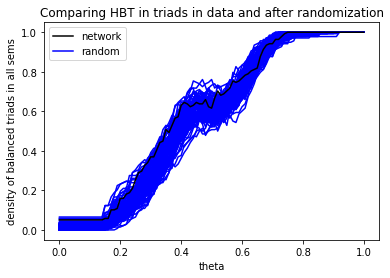

In [343]:
handles_rand = plt.plot(test_all_agents_terms_together_thetas, np.array(test_all_agents_terms_together_bal_dens_rands).T, 'b')
handles_net, = plt.plot(test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens, 'k')
# plt.legend(["network", "random"], handles = [handles_net, handles_rand[0]])
plt.legend([handles_net, handles_rand[0]], ["network", "random"])
plt.title("Comparing HBT in triads in data and after randomization")
plt.xlabel("theta")
plt.ylabel("density of balanced triads in all sems")

In [338]:
handles_net

Text(0, 0.5, 'density of balanced triads')

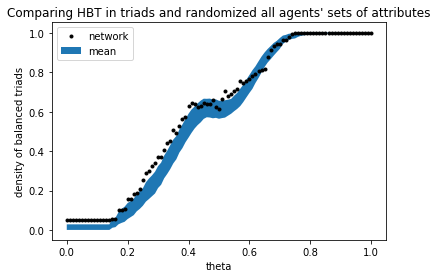

In [285]:
mean_vals = np.mean(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)
std_vals = np.std(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)

plt.plot(test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens, 'k.')

plt.fill_between(thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized all agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

Text(0, 0.5, 'density of balanced triads')

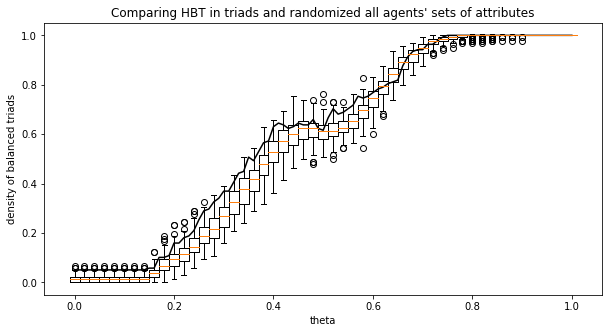

In [347]:
fig, axs = plt.subplots()
fig.set_size_inches(10,5)

every = 2

axs.boxplot(np.array(test_all_agents_terms_together_bal_dens_rands[:,::every]),positions = thetas[::every], widths = 0.02, manage_ticks = False)
# axs.margins(x = -0.2)
# axs.xticks([1, 2, 3], ['mon', 'tue', 'wed'])

axs.plot(test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens, 'k')
axs.set_title("Comparing HBT in triads and randomized all agents' sets of attributes")
axs.set_xlabel("theta")
axs.set_ylabel("density of balanced triads")

In [358]:
#Lets see if we still have such a good result, when we remove initial few ticks. 
th = 0.15
new_bds = np.sum(bal_dens[thetas > th])
new_bdsr = np.sum(bal_dens_rands[:,thetas > th],1)
np.sum(new_bds > new_bdsr), np.sum(new_bds >= new_bdsr)

# Still the result below 0.05, but the reason for this result might solely because of connections between agents
# thathave exactly same attributes. 

(96, 96)

In [357]:
bal_dens_rands[:,thetas > 0.15]

array([[0.014, 0.036, 0.065, ..., 1.   , 1.   , 1.   ],
       [0.029, 0.029, 0.029, ..., 1.   , 1.   , 1.   ],
       [0.   , 0.036, 0.036, ..., 1.   , 1.   , 1.   ],
       ...,
       [0.043, 0.051, 0.094, ..., 1.   , 1.   , 1.   ],
       [0.036, 0.036, 0.043, ..., 1.   , 1.   , 1.   ],
       [0.036, 0.043, 0.058, ..., 1.   , 1.   , 1.   ]])

In [235]:
first_sem = 2
last_sem = 6
thetas = np.linspace(0,1,101)
M = 100

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

bal_dens = np.zeros(len(thetas))

bal_dens_rands_sum = np.zeros(M)
attr_rands_M = [randomize_attribute_sets(dcor_attributes) for i in range(0,M)] 

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(dcor_attributes[semm], theta)
        bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]

bal_dens_rands = np.zeros([M, len(thetas)])
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = calc_link_polarities2(attr_rands_M[j][semm], theta)
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
bal_dens_sum = np.sum(bal_dens)

bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


(5799.0,
 array([5313., 5333., 5504., 5237., 5333., 5527., 5248., 5357., 5369.,
        5233., 5102., 5295., 5268., 5300., 5245., 5244., 5362., 5392.,
        5391., 5322., 5383., 5227., 5471., 5363., 5323., 5376., 5430.,
        5595., 5342., 5602., 5328., 5597., 5537., 5413., 5633., 5617.,
        5268., 5533., 5279., 5453., 5482., 5276., 5502., 5570., 5250.,
        5109., 5392., 5456., 5560., 5412., 5310., 5627., 5413., 5534.,
        5243., 5506., 5537., 5503., 5418., 5266., 5613., 5346., 5222.,
        5371., 5583., 5421., 5304., 5339., 5414., 5701., 5481., 5354.,
        5565., 5479., 5377., 5342., 5490., 5716., 5483., 5181., 5167.,
        5108., 5500., 5112., 5295., 5323., 5199., 5453., 5352., 5483.,
        5499., 5276., 5485., 5366., 5619., 5492., 5273., 5307., 5532.,
        5556.]))

In [236]:
np.sum(bal_dens_sum > bal_dens_rands_sum), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(100, 100)

In [178]:
#first result: 96, 96 / M = 100 / sem2-6 / error

93

# Randomizing triads in the whole network

In [47]:
def randomize_all_attributes(attr, randomized_agents = []):
    N, A = attr.shape
    
    if len(randomized_agents) == 0:
        randomized_agents = list(range(0,N))
    
    attr_rand = np.copy(attr)
    
    attr_copy = attr_rand[randomized_agents]
    
    np.random.shuffle(attr_copy)
    
    attr_rand[randomized_agents] = attr_copy
    
    return attr_rand

def randomize_attribute_sets(ord_attributes, randomized_agents_sets = []):
    rand_ord_attributes = dict((i, 0) for i in range(1,7))
    
    for sem in range(1,7):
        if len(randomized_agents_sets) == 0:
            randomized_agents = []
        else:
            randomized_agents = randomized_agents_sets[sem-1]
        rand_ord_attributes[sem] = randomize_all_attributes(ord_attributes[sem], randomized_agents)
    
    return rand_ord_attributes

""" Not working, because there are different student sets in each term. 
"""
def randomize_correlated(ord_attributes):
    rand_ord_attributes = dict((i, 0) for i in range(1,7))
    
    

def compare_bal_triads(triads, agents, th, attr_dif, M, randomized_agents = []):
    """
    triads - list of sets of node ids forming a triad
    agents - array of vectors of agent attributes
    th - threshold used
    attr_dif - max difference between attributes
    M - number of times to repeat randomization
    """
    polarities = calc_link_polarities2(agents, th, attr_dif)
    bal_dens = balanced_triad_density_network(polarities, triads)
    
    bal_dens_rands = np.zeros(M)
    
    for i in range(0,M):
        agents_rand = randomize_all_attributes(agents, randomized_agents)
        polarities_rand = calc_link_polarities2(agents_rand, th, attr_dif)
        bal_dens_rands[i] = balanced_triad_density_network(polarities_rand, triads)
        
    pval = np.sum(bal_dens_rands > bal_dens)
    
    return bal_dens_rands, bal_dens, pval

def compare_networks(data, th, attr_dif, M):
    pvals = np.zeros(6)
    vals = np.zeros(6)
    stds = np.zeros(6)
    difs = np.zeros(6)
    
    for n in range(1,7):
#         print(n)
        net = data[n]
        triads = get_triads(net)
        agents = dcor_attributes[n]
        
        bal_dens_rands, bal_dens, pval = compare_bal_triads(triads, agents, th, attr_dif, M)
        pvals[n-1] = pval
        vals[n - 1] = bal_dens
        difs[n-1] = np.mean(bal_dens - bal_dens_rands)
        stds[n-1] = np.std(difs)
    return pvals, vals, difs, stds

def compare_weighted_network(net, agents, th, attr_dif, M):
    polarities = calc_link_polarities2(agents, th, attr_dif)
    U_data, pval_data = compare_weighted_links(net, polarities)
    
    U_rands = np.zeros(M)
    pval_rands = np.zeros(M)
    
    for i in range(0,M):
        agents_rand = randomize_all_attributes(agents)
        polarities_rand = calc_link_polarities2(agents_rand, th, attr_dif)
        U_rands[i], pval_rands[i] = compare_weighted_links(net, polarities_rand)
    
    pval_U = np.sum(U_rands >= U_data)
    pval_pval = np.sum(pval_rands <= pval_data)
    
    return U_rands, pval_rands, pval_U, pval_pval

def compare_weighted_networks(data, ord_attributes, th, attr_dif, M):
    U_rands = np.zeros(M)
    pval_rands = np.zeros(M)
    
    U_data, pval_data = compare_all_weighted_links(data, ord_attributes, th, attr_dif)
    
    for i in range(0,M):
        rand_ord_attributes = randomize_attribute_sets(ord_attributes)
        U_rands[i], pval_rands[i] = compare_all_weighted_links(data, rand_ord_attributes, th, attr_dif)
    
    pval_U = np.sum(U_rands >= U_data)
    pval_pval = np.sum(pval_rands <= pval_data)
    
    return U_rands, pval_rands, pval_U, pval_pval

In [304]:
bal_dens_rands, bal_dens, pval = compare_bal_triads(triads, dcor_attributes[sem], 0.5, 2, 100)

In [305]:
np.sum(bal_dens_rands > bal_dens), np.mean(bal_dens_rands) - bal_dens, pval

(12, -0.0868888888888889, 18)

In [346]:
sem = 1
triads = get_triads(data[sem])

thetas = np.linspace(0,1,15)

bals = np.zeros(len(thetas))
rand_bals_mean = np.zeros(len(thetas))
rand_bals_std = np.zeros(len(thetas))
pvals = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[sem], theta, max_dif3, 100)
    rand_bals_mean[i] = np.mean(rand_bal)
    rand_bals_std[i] = np.std(rand_bal)
    bals[i] = bal
    pvals[i] = pval


Text(0, 0.5, 'density of balanced triads')

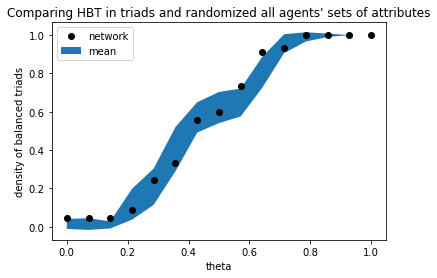

In [347]:
plt.plot(thetas, bals, 'ko')
# plt.plot(thetas, rand_bals_mean)
plt.fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized all agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [348]:
pvals, max_dif3

(array([ 8., 11.,  4., 53., 31., 73., 51., 53., 11.,  7., 70.,  0.,  0.,
         0.,  0.]),
 1.9498109791002052)

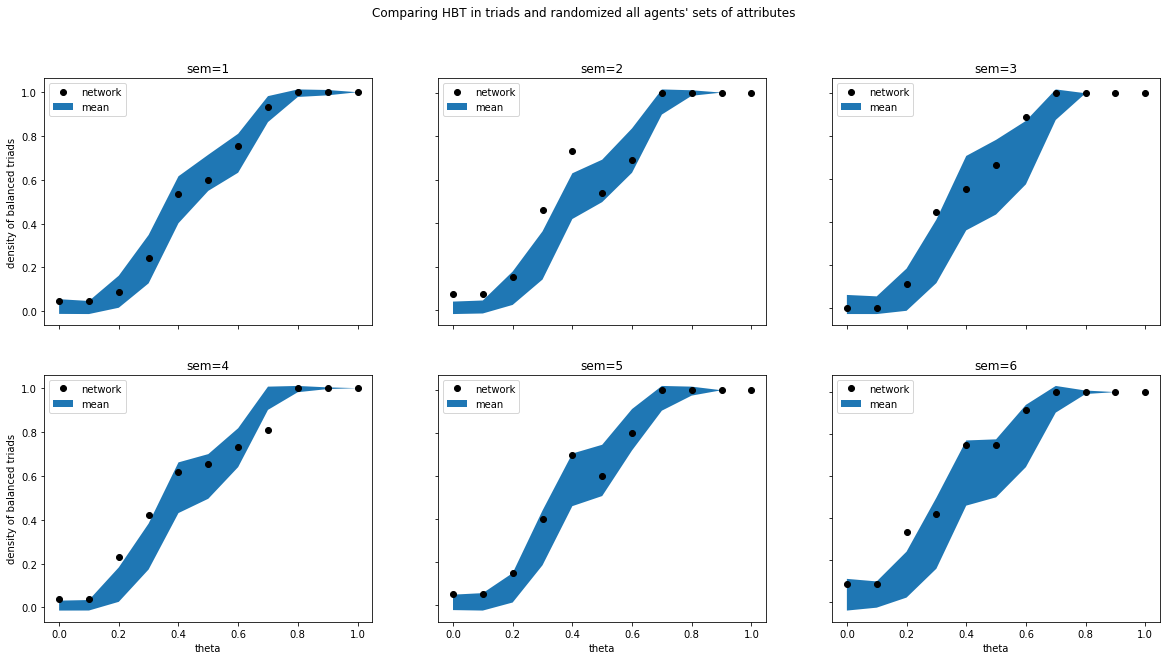

In [349]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,11)
pvals = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing HBT in triads and randomized all agents' sets of attributes")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        triads = get_triads(data[semm])

        bals = np.zeros(len(thetas))
        rand_bals_mean = np.zeros(len(thetas))
        rand_bals_std = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[semm], theta, max_dif3, 100)
            rand_bals_mean[i] = np.mean(rand_bal)
            rand_bals_std[i] = np.std(rand_bal)
            bals[i] = bal
            pvals[semm][i] = pval
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
        axs[a1, a2].legend(["network", "mean"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [350]:
pvals

{1: array([17.,  9., 38., 41., 34., 55., 29., 44.,  0.,  0.,  0.]),
 2: array([ 2.,  2., 17.,  2.,  1., 69., 62.,  0.,  0.,  0.,  0.]),
 3: array([12.,  9., 19.,  6., 34., 27.,  4.,  0.,  0.,  0.,  0.]),
 4: array([ 5.,  6.,  5.,  6., 18., 27., 41., 97.,  0.,  0.,  0.]),
 5: array([ 4.,  9., 10., 23., 13., 55., 49.,  0.,  0.,  0.,  0.]),
 6: array([ 9.,  9.,  3., 22., 14., 14., 11.,  0.,  0.,  0.,  0.])}

# Randomizing attributes only inside triads

In [280]:
sem = 1
triads = get_triads(data[sem])

In [379]:

triad_agents = np.unique(list(chain.from_iterable(triads)))
dcor_attributes[1][triad_agents];

In [354]:
sem = 2
triads = get_triads(data[sem])
triad_agents = np.unique(list(chain.from_iterable(triads)))

thetas = np.linspace(0,1,11)

bals = np.zeros(len(thetas))
rand_bals_mean = np.zeros(len(thetas))
rand_bals_std = np.zeros(len(thetas))
pvals_t = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[sem], theta, max_dif3, 100, triad_agents)
    rand_bals_mean[i] = np.mean(rand_bal)
    rand_bals_std[i] = np.std(rand_bal)
    bals[i] = bal
    pvals_t[i] = pval

Text(0, 0.5, 'density of balanced triads')

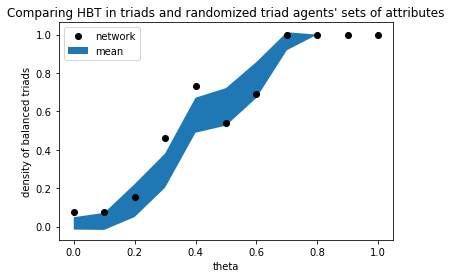

In [355]:
plt.plot(thetas, bals, 'ko')
# plt.plot(thetas, rand_bals_mean)
plt.fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized triad agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [356]:
pvals_t, triad_agents

(array([ 5.,  9., 33.,  3.,  2., 74., 70.,  0.,  0.,  0.,  0.]),
 array([ 0,  1,  4,  5,  8,  9, 10, 11, 14, 15, 16, 20, 21, 22, 23, 24, 25,
        26, 27, 28, 29, 30, 31, 32, 33, 34, 38, 39, 40, 41, 44, 45, 48, 51,
        58, 66, 76]))

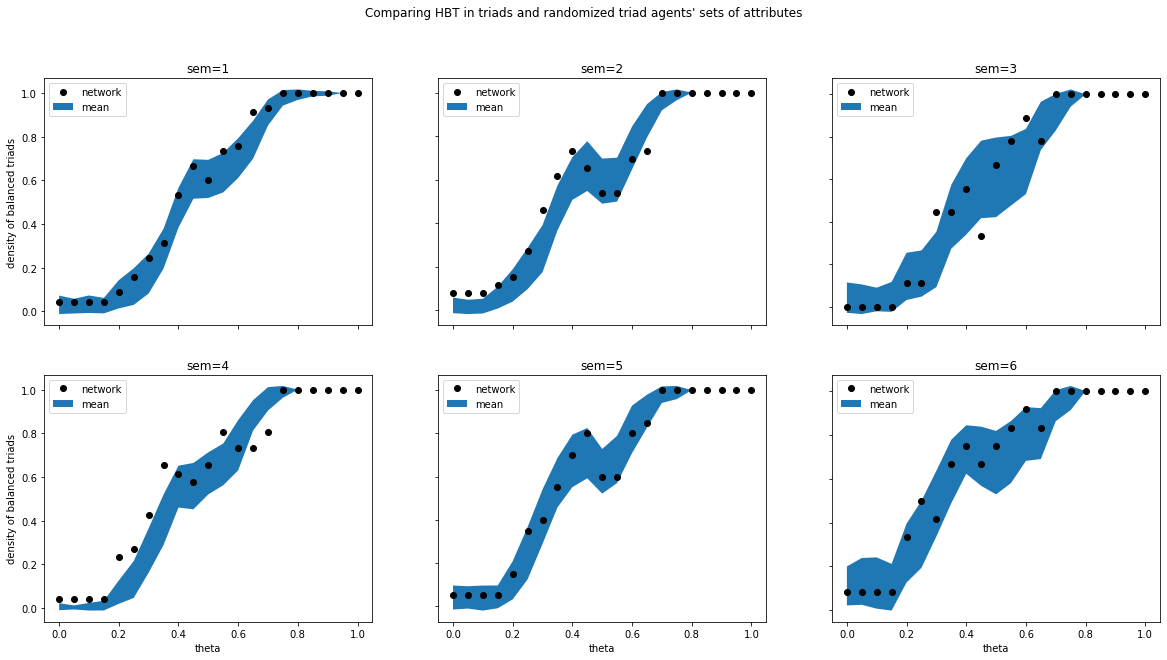

In [360]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,21)
pvals_t = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing HBT in triads and randomized triad agents' sets of attributes")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        triads = get_triads(data[semm])
        triad_agents = np.unique(list(chain.from_iterable(triads)))

        bals = np.zeros(len(thetas))
        rand_bals_mean = np.zeros(len(thetas))
        rand_bals_std = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[semm], theta, max_dif3, 100, triad_agents)
            rand_bals_mean[i] = np.mean(rand_bal)
            rand_bals_std[i] = np.std(rand_bal)
            bals[i] = bal
            pvals_t[semm][i] = pval
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
        axs[a1, a2].legend(["network", "mean"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [361]:
pvals_t

{1: array([22., 16., 23., 16., 29., 24., 19., 34., 23., 18., 49., 13., 22.,
         7., 34.,  0.,  0.,  0.,  0.,  0.,  0.]),
 2: array([ 5.,  3.,  5.,  6., 19., 14.,  2.,  4.,  5., 45., 66., 68., 62.,
        93.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 3: array([30., 23., 28., 34., 39., 43.,  3., 31., 33., 88., 29., 11.,  5.,
        61.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 4: array([ 3.,  1.,  3.,  3.,  0.,  5.,  4.,  1., 23., 40., 25.,  4., 51.,
        95., 96.,  0.,  0.,  0.,  0.,  0.,  0.]),
 5: array([21., 23., 20., 24., 28., 15., 45., 47., 32., 11., 47., 68., 53.,
        67.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 6: array([44., 50., 42., 30., 22., 12., 57., 29., 25., 49., 23., 11.,  8.,
        31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])}

## Putting all semesters together

In [363]:
first_sem = 1
last_sem = 6
thetas = np.linspace(0,1,101)
M = 100

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

triad_agents = [np.unique(list(chain.from_iterable(triads))) for triads in triads_all]

bal_dens = np.zeros(len(thetas))

bal_dens_rands_sum = np.zeros(M)
attr_rands_M = [randomize_attribute_sets(dcor_attributes, triad_agents) for i in range(0,M)] 

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(dcor_attributes[semm], theta)
        bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]

bal_dens_rands = np.zeros([M, len(thetas)])
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = calc_link_polarities2(attr_rands_M[j][semm], theta)
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
bal_dens_sum = np.sum(bal_dens)

bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

#saving data for this simulation
test_triad_agents_terms_together_thetas = thetas
test_triad_agents_terms_together_bal_dens = bal_dens
test_triad_agents_terms_together_bal_dens_rands = bal_dens_rands

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


(8415.0,
 array([8060., 8051., 8149., 8349., 7924., 7692., 8040., 8322., 8092.,
        8079., 8209., 7871., 8429., 7899., 8240., 8064., 8224., 8162.,
        7896., 7904., 7975., 7782., 8276., 8095., 8059., 8345., 8225.,
        7657., 8294., 8217., 8081., 7946., 7960., 8015., 8235., 8031.,
        7924., 8027., 8029., 7841., 7836., 7978., 7760., 8180., 8158.,
        8057., 7989., 8067., 8026., 8237., 8355., 7568., 7698., 7981.,
        7880., 8025., 8296., 8015., 8410., 8277., 7941., 8112., 7834.,
        7897., 8234., 7865., 7885., 8028., 8205., 7799., 8014., 8199.,
        7859., 8026., 8194., 8218., 7749., 7906., 7975., 8305., 7783.,
        8003., 7902., 8224., 7882., 8227., 8116., 7941., 7889., 8196.,
        8435., 8051., 8202., 8123., 8332., 7923., 8060., 7981., 8060.,
        8274.]))

In [368]:
np.sum(bal_dens_sum > bal_dens_rands_sum), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(98, 98)

In [365]:
#results: 98,98 / M = 100 / no error

In [366]:
pvals_T = np.zeros(len(thetas))
for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(bal_dens_rands[:,i] > bal_dens[i])

pvals_T

array([13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 16., 17., 17., 23., 25., 10., 11.,  7., 10.,  7.,  3.,
        0.,  2.,  0.,  0.,  0.,  1.,  3.,  4.,  7.,  2., 16., 13., 11.,
       18.,  8., 10., 23., 37., 38., 33., 43., 33., 15., 33., 45., 15.,
        2., 11., 10.,  9.,  9.,  6., 14., 18., 27., 23., 32., 44., 51.,
       63., 28., 10., 13., 19., 44., 25., 48., 41.,  9.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Text(0, 0.5, 'density of balanced triads')

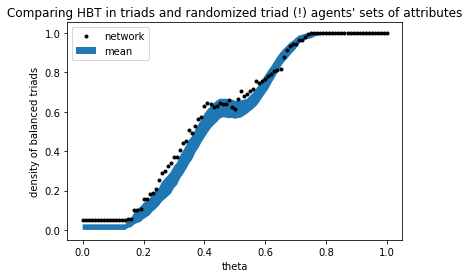

In [367]:
mean_vals = np.mean(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)
std_vals = np.std(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)

plt.plot(test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens, 'k.')

plt.fill_between(thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized triad (!) agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

# Comparing links after decorrelation

In [380]:
sem = 1
th = 0.5

polarities = calc_link_polarities2(dcor_attributes[sem], th)
pol_old = calc_link_polarities2(ord_attributes[sem], th, 2)



In [385]:
ones = np.sum(polarities == 1)/2
ones_old = np.sum(pol_old == 1)/2

ones, ones_old

(2607.0, 2933.0)

In [389]:
N = polarities.shape[0]
same = (np.sum(polarities == pol_old) - N)/2
same, same/N/(N-1)*2

(3777.0, 0.7946560067325898)

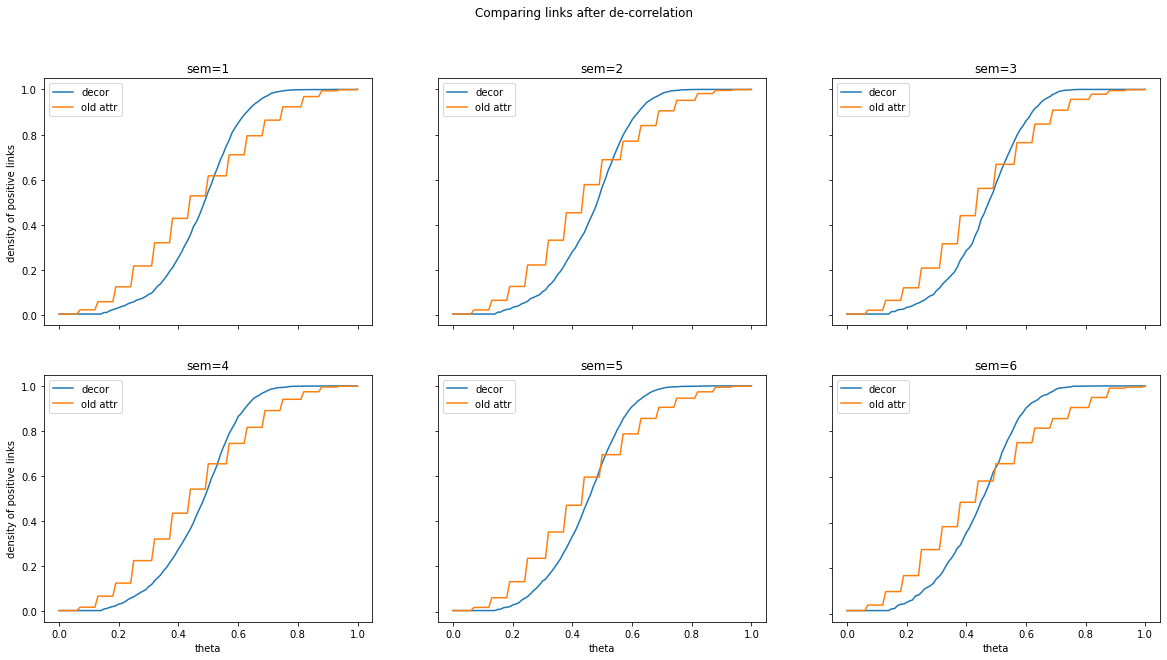

In [436]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,101)

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing links after de-correlation")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        ones = np.zeros(len(thetas))
        ones_old = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(dcor_attributes[semm], theta)
            pol_old = calc_link_polarities2(ord_attributes[semm], theta, 2)
            
            N = polarities.shape[0]
            ones[i] = np.sum(polarities == 1)/2 / N/(N-1)*2
            ones_old[i] = np.sum(pol_old == 1)/2 / N/(N-1)*2
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, ones, thetas, ones_old)
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].legend(["decor", "old attr"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of positive links')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

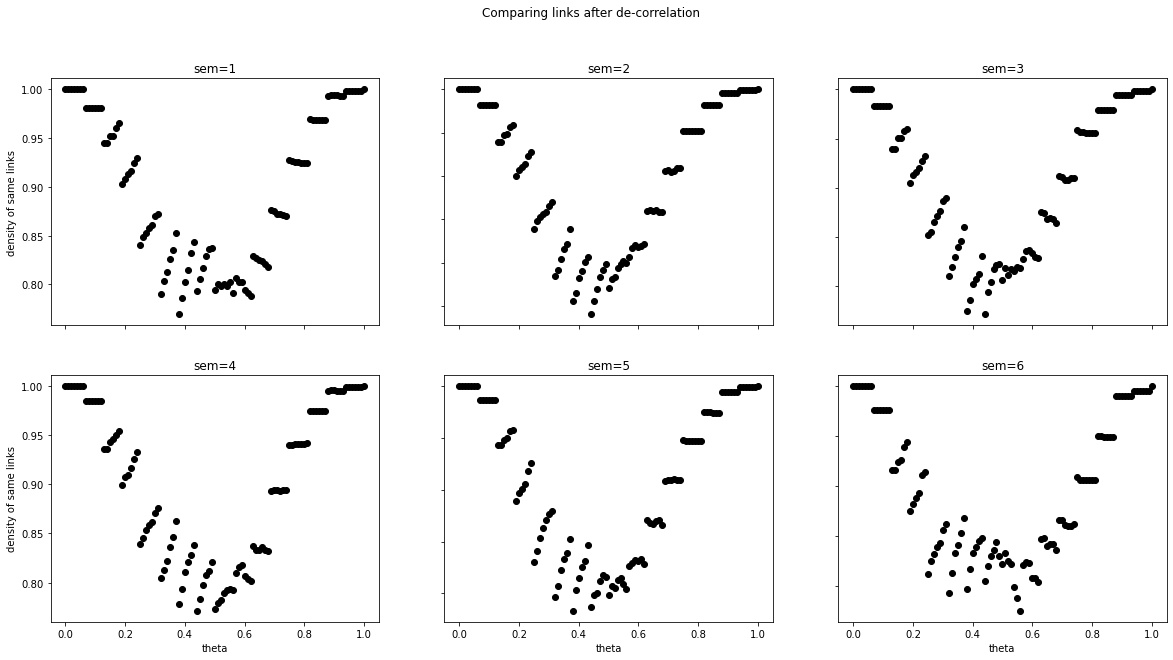

In [435]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,101)

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing links after de-correlation")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        sames = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(dcor_attributes[semm], theta)
            pol_old = calc_link_polarities2(ord_attributes[semm], theta, 2)
            
            N = polarities.shape[0]
            sames[i] = (np.sum(polarities == pol_old) - N)/2 / N/(N-1)*2
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, sames, 'ko')
        # plt.plot(thetas, rand_bals_mean)

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of same links')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [425]:
data[6].degree

DegreeView({10060: 4, 85596: 10, 75261: 7, 71627: 2, 57637: 10, 66754: 6, 51552: 8, 23144: 13, 50869: 6, 25947: 6, 46160: 5, 46654: 2, 13799: 7, 86727: 4, 51722: 6, 59367: 2, 63188: 2, 68494: 6, 29914: 4, 15071: 4, 45539: 4, 46771: 5, 40997: 10, 53275: 6, 14188: 3, 17353: 2, 80058: 4, 30076: 4, 89827: 6, 37617: 2, 78911: 2, 62555: 4, 76313: 1, 50181: 1, 10841: 5, 72746: 2, 45945: 2, 26425: 2, 52067: 3, 34250: 2, 23642: 3, 66404: 6, 86352: 1, 16495: 6, 30952: 2, 19844: 1, 51597: 3, 52635: 2, 88175: 2, 75468: 2, 46021: 4, 66052: 2, 18420: 1, 68633: 2, 53884: 1, 32174: 1, 62560: 2, 25544: 5, 18344: 3, 39783: 2, 49597: 2, 44520: 2, 31583: 1})

In [405]:
A = nx.adjacency_matrix(data[6]).todense()

In [406]:
data[6].nodes

NodeView((10060, 85596, 75261, 71627, 57637, 66754, 51552, 23144, 50869, 25947, 46160, 46654, 13799, 86727, 51722, 59367, 63188, 68494, 29914, 15071, 45539, 46771, 40997, 53275, 14188, 17353, 80058, 30076, 89827, 37617, 78911, 62555, 76313, 50181, 10841, 72746, 45945, 26425, 52067, 34250, 23642, 66404, 86352, 16495, 30952, 19844, 51597, 52635, 88175, 75468, 46021, 66052, 18420, 68633, 53884, 32174, 62560, 25544, 18344, 39783, 49597, 44520, 31583))

In [430]:
degrees2 = [np.sum(A[:,i]>0) for i in range(0,len(data[6].nodes))]

In [437]:
len(degrees2), len(data[6].nodes)

(63, 63)

In [440]:
np.sort(data[6].nodes)

array([10060, 10841, 13799, 14188, 15071, 16495, 17353, 18344, 18420,
       19844, 23144, 23642, 25544, 25947, 26425, 29914, 30076, 30952,
       31583, 32174, 34250, 37617, 39783, 40997, 44520, 45539, 45945,
       46021, 46160, 46654, 46771, 49597, 50181, 50869, 51552, 51597,
       51722, 52067, 52635, 53275, 53884, 57637, 59367, 62555, 62560,
       63188, 66052, 66404, 66754, 68494, 68633, 71627, 72746, 75261,
       75468, 76313, 78911, 80058, 85596, 86352, 86727, 88175, 89827])

In [463]:
np.sum(A[0,:]>0), np.sum(A[0,:])

(1, 652)

In [452]:
list(data[6].neighbors(10060))

[51722, 85596]

In [453]:
data[6][10060]

AtlasView(UnionAtlas({85596: {'weight': 638}, 51722: {'weight': 14}}, {85596: {'weight': 844}, 51722: {'weight': 16}}))

In [456]:
list(data[6].neighbors(31583)), data[6][31583]

([88175], AtlasView(UnionAtlas({}, {88175: {'weight': 1}})))

What we can see above is that this is in fact a directed network! But adjacency matrix is undirected. 

I will check whether the order of nodes is good. 

In [466]:
np.sum(A[-3,:]>0), data[6][49597]

(1, AtlasView(UnionAtlas({39783: {'weight': 6}}, {39783: {'weight': 5}})))

In [458]:
nx.is_directed(data[6])

False

In [460]:
list(nx.enumerate_all_cliques(data[6]))

[[10060],
 [85596],
 [75261],
 [71627],
 [57637],
 [66754],
 [51552],
 [23144],
 [50869],
 [25947],
 [46160],
 [46654],
 [13799],
 [86727],
 [51722],
 [59367],
 [63188],
 [68494],
 [29914],
 [15071],
 [45539],
 [46771],
 [40997],
 [53275],
 [14188],
 [17353],
 [80058],
 [30076],
 [89827],
 [37617],
 [78911],
 [62555],
 [76313],
 [50181],
 [10841],
 [72746],
 [45945],
 [26425],
 [52067],
 [34250],
 [23642],
 [66404],
 [86352],
 [16495],
 [30952],
 [19844],
 [51597],
 [52635],
 [88175],
 [75468],
 [46021],
 [66052],
 [18420],
 [68633],
 [53884],
 [32174],
 [62560],
 [25544],
 [18344],
 [39783],
 [49597],
 [44520],
 [31583],
 [10060, 85596],
 [10060, 51722],
 [85596, 50869],
 [85596, 51722],
 [85596, 68494],
 [85596, 37617],
 [75261, 71627],
 [75261, 46654],
 [75261, 66404],
 [75261, 62560],
 [57637, 66754],
 [57637, 51552],
 [57637, 23144],
 [57637, 89827],
 [57637, 25544],
 [66754, 51552],
 [66754, 89827],
 [51552, 23144],
 [51552, 89827],
 [23144, 50869],
 [23144, 46160],
 [23144, 2642

In [468]:
get_triads(data[6])

[(0, 1, 14),
 (4, 5, 6),
 (4, 5, 28),
 (4, 6, 7),
 (4, 6, 28),
 (5, 6, 28),
 (7, 10, 40),
 (12, 13, 20),
 (18, 19, 21),
 (22, 23, 34),
 (23, 34, 53),
 (26, 27, 41)]

OK, the order of nodes is correct. 

Now let's check how weights in adjacency matrix are correlated with the weights in nodes' attributes

In [476]:
data[6][10060], A[0,:]

(AtlasView(UnionAtlas({85596: {'weight': 638}, 51722: {'weight': 14}}, {85596: {'weight': 844}, 51722: {'weight': 16}})),
 matrix([[  0, 638,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,  14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]]))

Adjacency matrix is symmetric. 

However, the weights are neither the maximum nor minimum weight of a weight i->j and j->i. 
Above is the example it is not the maximum (638, 844 -> 638). 
Also (14, 1 -> 14)


In [480]:
data[6][57637], A[4,:]

(AtlasView(UnionAtlas({66754: {'weight': 123}, 51552: {'weight': 19}, 23144: {'weight': 86}, 89827: {'weight': 6}, 25544: {'weight': 6}}, {23144: {'weight': 72}, 66754: {'weight': 106}, 51552: {'weight': 13}, 89827: {'weight': 2}, 25544: {'weight': 8}})),
 matrix([[  0,   0,   0,   0,   0, 123,  19,  86,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   6,   0,   0,   0,   0,   0]]))

It seems, that which value of weight is given is related to which node was entered first. 

In [491]:
data_nodes = list(data[6].nodes)
data[6][data_nodes[0]][85596], data[6][data_nodes[0]]

({'weight': 638},
 AtlasView(UnionAtlas({85596: {'weight': 638}, 51722: {'weight': 14}}, {85596: {'weight': 844}, 51722: {'weight': 16}})))

In [493]:
data[6][data_nodes[0]][85596]['weight']

638

In [577]:
def create_directed_adj_mat(net):
    A_undir = nx.adjacency_matrix(net).todense()
    A_dir = np.zeros(A_undir.shape, dtype=int)
    
    data_nodes = list(net.nodes)
    
    for node_ind, node in enumerate(data_nodes):
        for neigh in net[data_nodes[node_ind]]:
            try:
                neigh_ind = np.where(np.array(data_nodes) == neigh)[0][0]
            except KeyError:
                print(neigh)
                print(np.array(data_nodes) == neigh)
                print(data_nodes)
                print(net[data_nodes[node_ind]])
            try:
                A_dir[node_ind,neigh_ind] = net[data_nodes[node_ind]][neigh]['weight']
            except KeyError:
                print(node_ind, neigh_ind)
                print(net[data_nodes[node_ind]])
                print(net[data_nodes[node_ind]][neigh_ind])
                print(net[data_nodes[node_ind]][neigh_ind]['weight'])
    return A_dir, A_undir

"""
This can find also directed triads. 
"""
def get_triads_from_adj_mat(A):
    N = A.shape[0]
    
    triads = dict()
    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] == 0:
                continue
            for k in range(j+1,N):
                if A[j,k] > 0 and A[k,i] > 0:
                    triads[(i,j,k)] = (A[i,j], A[j,k], A[k, i])
    
    for i in range(0,N):
        for j in range(i+1,N):
            if A[j,i] == 0:
                continue
            for k in range(j+1,N):
                if A[k,j] > 0 and A[i,k] > 0:
                    triads[(k,j,i)] = (A[k,j], A[j,i], A[i,k])
    return triads

def find_th_polarity_change(attr, agent1, agent2, sem, dif_max = max_dif3):
    thresholds = np.linspace(0,1,101)
    
    beg_polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], 0, dif_max)
    
    for th in thresholds:
        polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], th, dif_max)
        if beg_polarity != polarity:
            break
        
    return th
    

In [558]:
A_dir, A_undir = create_directed_adj_mat(data[6])

In [559]:
triads = get_triads_from_adj_mat(A_dir)
triads

{(0, 1, 14): (638, 123, 16),
 (4, 5, 6): (123, 13, 13),
 (4, 5, 28): (123, 39, 2),
 (4, 6, 7): (19, 9, 72),
 (4, 6, 28): (19, 4, 2),
 (5, 6, 28): (13, 4, 25),
 (7, 10, 40): (1, 25, 1),
 (12, 13, 20): (16, 329, 7784),
 (18, 19, 21): (10, 2, 27),
 (22, 23, 34): (37, 18, 1),
 (23, 34, 53): (18, 4, 2),
 (26, 27, 41): (2, 115, 8),
 (14, 1, 0): (98, 844, 14),
 (6, 5, 4): (11, 106, 19),
 (28, 5, 4): (25, 106, 6),
 (7, 6, 4): (11, 13, 86),
 (28, 6, 4): (5, 13, 6),
 (28, 6, 5): (5, 11, 39),
 (40, 10, 7): (33, 1, 1),
 (20, 13, 12): (329, 10, 8604),
 (21, 19, 18): (7, 7, 21),
 (34, 23, 22): (10, 36, 1),
 (53, 34, 23): (4, 10, 2),
 (41, 27, 26): (101, 2, 6)}

In [562]:
sem = 6
th = 0.4

polarities = calc_link_polarities2(dcor_attributes[sem], th)
pol_old = calc_link_polarities2(ord_attributes[sem], th, 2)

In [569]:
polarities[12,13]

1.0

In [614]:
agent1 = 7
agent2 = 40
agent3 = 10
find_th_polarity_change(dcor_attributes, agent1, agent2, sem), find_th_polarity_change(ord_attributes, agent1, agent2, sem, 2)

(0.46, 0.25)

In [611]:
sem = 6
attr = dcor_attributes
agent1 = 40
agent2= 10
beg_polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], 0)
thresholds = np.linspace(0,1,101)
for th in thresholds:
    polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], th)
    if beg_polarity != polarity:
        print(th)
        break

0.56


In [605]:
dcor_attributes[sem][agent1], dcor_attributes[sem][agent2]

(array([-3.092,  0.259,  0.143,  0.064, -0.09 , -0.561, -0.934,  0.395]),
 array([-7.171,  0.974,  1.286,  0.951, -0.07 , -0.785,  0.362,  0.571]))

In [616]:
agent1 = 7
agent2 = 40
agent3 = 10
calc_distance(dcor_attributes[sem][agent1], dcor_attributes[sem][agent2], max_dif3), calc_distance(dcor_attributes[sem][agent1], dcor_attributes[sem][agent3], max_dif3),  calc_distance(dcor_attributes[sem][agent3], dcor_attributes[sem][agent2], max_dif3)

(0.45101236526255084, 0.5163075877959884, 0.5576475905238091)

Czemu losujemy tylko po agentach, którzy tworzą triady? Czy to ma sens?

Agenci, którzy nie tworzą triad, może mają połączenia z innymi agentami, ale ich nie widzimy. Stąd jest sens ich nie brać. 

Ale jaki sens ma, że bierzemy jedną triadę ABC i triadę DEF, które są oderwane od reszty sieci i mieszamy agentów? 

Wychodzi, że atrybuty nie mają takiego znaczenia, jeśli chodzi o otrzymanie odpowiedniej równowagi. Ewentualnie, ja źle na nie patrzę. 

# Testing statistical properties of a model with random vector attributes

Pomysły: 

1. Wygeneruję losowe atrybuty (randomizacja). Następnie wykonam jeszcze M randomizacji i policzę odgległości w zależności od tety. Następnie sprawdzę, czy te różnice są opisywane np. rozkładem normalnym, co pozwoliłoby wykorzystać t-test w porównaniu danych rzeczywsitych. 
2. Założę rozkłąd jednorodny teta. Będę losował teta i w ten sposób otrzymam odpowiednie wartości z danych rzeczywistych lub z modelu losowego (randomizacji). Otrzymam dwa ciągi liczb i będę mógł je porównać np. Kruskalem. 

In [63]:
first_sem = 1
last_sem = 6
thetas = np.linspace(0,1,101)
M = 100

################################
art = randomize_attribute_sets(dcor_attributes)
attr_rands_M = [randomize_attribute_sets(dcor_attributes) for i in range(0,M)] 

############################3
triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

bal_dens = np.zeros(len(thetas))
bal_dens_rands_sum = np.zeros(M)

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(art[semm], theta)
        bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]

bal_dens_rands = np.zeros([M, len(thetas)])
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = calc_link_polarities2(attr_rands_M[j][semm], theta)
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
bal_dens_sum = np.sum(bal_dens)

bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


(7890.0,
 array([7878., 7943., 7913., 7596., 8129., 8083., 8027., 8434., 7682.,
        8120., 7882., 7792., 7846., 7791., 8258., 8276., 7840., 8003.,
        7921., 7676., 7767., 8159., 7627., 7839., 7993., 7977., 8130.,
        8082., 7731., 7699., 8380., 7836., 7882., 7993., 8080., 7915.,
        8111., 7859., 7915., 7833., 7580., 7762., 8123., 7912., 7951.,
        8096., 7951., 8123., 7819., 8057., 8116., 7882., 8313., 8042.,
        7861., 8283., 7735., 7783., 7742., 8042., 8214., 8154., 8229.,
        7995., 7979., 7999., 8096., 8168., 8138., 7886., 7915., 7859.,
        7839., 8472., 7701., 7972., 7520., 8061., 8066., 7724., 7872.,
        7872., 8164., 8023., 8268., 7984., 7807., 7929., 7881., 7709.,
        7783., 7851., 8130., 7976., 7619., 7889., 7812., 7970., 7929.,
        7934.]))

(array([0.   , 0.   , 0.001, 0.002, 0.001, 0.002, 0.002, 0.001, 0.001,
        0.   ]),
 array([-582. , -486.8, -391.6, -296.4, -201.2, -106. ,  -10.8,   84.4,
         179.6,  274.8,  370. ]),
 <BarContainer object of 10 artists>)

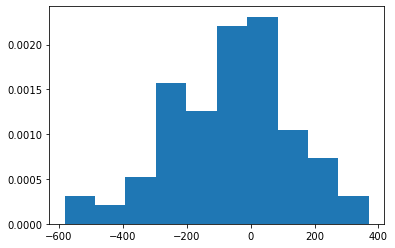

In [64]:
plt.hist(bal_dens_sum - bal_dens_rands_sum, density=True)

In [65]:
import statsmodels.api as sm
import pylab as py

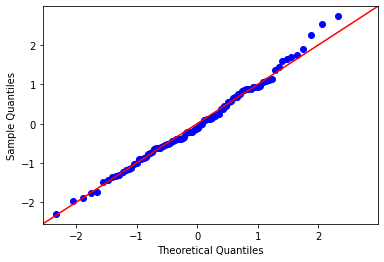

In [71]:
bal_dens_rands_sum_mean = np.mean(bal_dens_rands_sum)
bal_dens_rands_sum_std = np.std(bal_dens_rands_sum)

data_points = (bal_dens_rands_sum - bal_dens_rands_sum_mean) / bal_dens_rands_sum_std

sm.qqplot(data_points, line ='45')
py.show()

In [73]:
stats.shapiro(data_points)

ShapiroResult(statistic=0.9908419847488403, pvalue=0.7324216961860657)

In [74]:
stats.shapiro(bal_dens_rands_sum)

ShapiroResult(statistic=0.9908415079116821, pvalue=0.7323837280273438)

Conclusion: one can treat the sum of densities as a random variable. So we can test the obtain statistic from real data using the Student's t-test. 

In [85]:
1-stats.norm.cdf(8415,bal_dens_rands_sum_mean, bal_dens_rands_sum_std)

0.007496395239859122

Powyżej jest p-value rezultatu sumy gęstości przy założeniu normalności uzyskiwanych gęstości z danych losowych. Oczywiście przy stosownym teście hipoteza, że dane pochodzą z takiego rozkładu jak dane losowe, zostałaby odrzucona. 

In [91]:
bal_dens_rands

array([[0.007, 0.007, 0.007, ..., 1.   , 1.   , 1.   ],
       [0.022, 0.022, 0.022, ..., 1.   , 1.   , 1.   ],
       [0.   , 0.   , 0.   , ..., 1.   , 1.   , 1.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 1.   , 1.   , 1.   ],
       [0.022, 0.022, 0.022, ..., 1.   , 1.   , 1.   ],
       [0.014, 0.014, 0.014, ..., 1.   , 1.   , 1.   ]])

/home/pgorski/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9764745831489563, pvalue=1.731517413263134e-34)

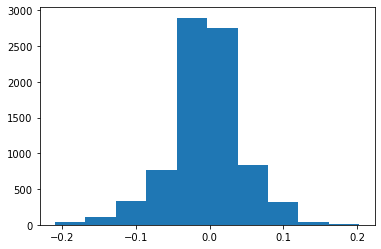

In [111]:
data_points = [(bal_dens - bal_dens_rands[i])[:-20] for i in range(M)]

# data_points[data_points == 0]

plt.hist([item for sublist in data_points for item in sublist])

stats.shapiro(data_points)

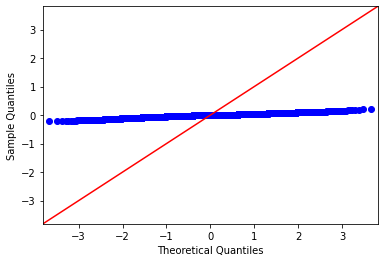

In [113]:
dd = np.array([item for sublist in data_points for item in sublist])
sm.qqplot(dd, line ='45')
py.show()

Różnice nie są normalne. Przy porównywaniu przebiegów konieczne są testy nieparametryczne. 

Przeprowadzę test Wilcoxona w ten sposób, że wylosuję M thet i dla każdej z nich policzę bal_dens w danych i dla każdej z nich przeprowadzę randomizację i policzę gęstość zrównoważonych. 

In [120]:
first_sem = 1
last_sem = 6
M = 1000

thetas = np.random.random(M)


################################
# art = randomize_attribute_sets(dcor_attributes)
attr_rands_M = [randomize_attribute_sets(dcor_attributes) for i in range(0,M)] 

############################3
triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

bal_dens = np.zeros(len(thetas))
bal_dens_rands = np.zeros(M)

for i, theta in enumerate(thetas):
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        
        polarities = calc_link_polarities2(dcor_attributes[semm], theta)
        bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
        
        attr_rand = randomize_attribute_sets(dcor_attributes)
        polarities_rand = calc_link_polarities2(attr_rand[semm], theta)
        bal_dens_rands[i] = bal_dens_rands[i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]


bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

np.sum(bal_dens > bal_dens_rands), np.sum(bal_dens >= bal_dens_rands)

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


(637, 877)

In [121]:
stats.wilcoxon(bal_dens, bal_dens_rands, alternative = 'greater')

WilcoxonResult(statistic=257272.5, pvalue=1.2032411652482222e-77)

Wynikiem testu Wilcoxona jest odrzucenie H0 iprzyjęcie hipotezy, że mediana gęstości rzeczywistych jest większa niż mediana gęstości zrandomizowanych. 

In [123]:
from statsmodels.stats import descriptivestats
descriptivestats.sign_test(bal_dens - bal_dens_rands)

(257.0, 2.1290343399796725e-84)

Dwustronny test znaków daje taką samą odpowiedź. (Python nie ma jednostronnej wersji tego testu.)

# Checking unique values of transformed variables

# Sum of ranks analysis

Let's calculate a rank for a given threshold for each series for randomized datasets and let's what is the distribution of these values. Is it normal?

What is the prob. that the sum of ranks for RL dataset is larger than for randomized datasets? 

In [3]:
def calc_rank(vals, val):
    """
    Includes val in vals array sorts it and calculates rank for the val.
    """
    all_vals = np.append(vals, val)
    
    all_ranks = stats.rankdata(all_vals)
    return all_ranks[-1]

def calc_ranks(vals, val = []):
    """
    Calculated ranks and allows to include one more value. 
    """
    all_vals = np.append(vals, val)
    
    all_ranks = stats.rankdata(all_vals)
    if np.isscalar(val):
        return all_ranks[0:-1], all_ranks[-1]
    else:
        return all_ranks, []

def get_important_theta_values(thetas, bal_dens_rands, bal_dens = [], distances = [i/16 for i in range(0,16)]):
    """
    There are only 16 (17) distinct thetas. So we do not need all the values. 
    """
    pds = np.array([bal_dens[np.where(thetas >= distances[i])[0][0]] for i in range(0, len(distances))])
    rds = np.array([[bal_dens_rands[j][np.where(thetas >= distances[i])[0][0]] for i in range(0, len(distances))] for j in range(0, len(bal_dens_rands))])
    return pds, rds

def calc_ranks_thetas(bal_dens_rands, bal_dens = []):
    M, num_thetas = bal_dens_rands.shape
#     print(M); 
#     print(num_thetas)
    rl_rank = np.zeros(num_thetas)
    rand_ranks = np.zeros([num_thetas, M])
    
    for theta_ind in range(0, num_thetas):
        vals = [bal_dens_rands[i][theta_ind] for i in range(0, M)]
        if len(bal_dens) > 0:
            val = bal_dens[theta_ind]
        else:
            val = []
        
        rand_ranks[theta_ind], rl_rank[theta_ind] = calc_ranks(vals, val)
    return rand_ranks, rl_rank


In [4]:
test_all_agents_terms_together_bal_dens_rands

array([[0.00724638, 0.00724638, 0.00724638, ..., 0.94927536, 0.94927536,
        1.        ],
       [0.00724638, 0.00724638, 0.00724638, ..., 1.        , 1.        ,
        1.        ],
       [0.00724638, 0.00724638, 0.00724638, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.02898551, 0.02898551, 0.02898551, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.03623188, 0.03623188, 0.03623188, ..., 0.99275362, 0.99275362,
        1.        ]])

In [5]:
distances = [i/16 for i in range(0,16)]
pds = np.array([test_all_agents_terms_together_bal_dens[np.where(test_all_agents_terms_together_thetas >= distances[i])[0][0]] for i in range(0, len(distances))])
rds = np.array([[test_all_agents_terms_together_bal_dens_rands[j][np.where(test_all_agents_terms_together_thetas >= distances[i])[0][0]] for i in range(0, len(distances))] for j in range(0, len(test_all_agents_terms_together_bal_dens_rands))])
    

In [6]:
vals = [rds[i][0] for i in range(0, len(rds))]
val = pds[0]

calc_ranks(vals, val)

(array([ 370.5,  370.5,  370.5,  961. ,  122. ,  370.5,  961. ,  851. ,
         370.5,  744. ,  744. ,  921. ,  921. ,  588. ,  122. ,  122. ,
         961. ,  744. ,  851. ,  370.5,  122. ,  122. ,  370.5,  122. ,
         122. ,  370.5,  370.5,  921. ,  961. ,  851. ,  122. ,  851. ,
         122. ,  588. ,  370.5,  370.5,  370.5,  851. ,  370.5,  370.5,
         851. ,  370.5,  588. ,  122. ,  588. ,  122. ,  998. ,  370.5,
         122. ,  921. ,  744. ,  744. ,  122. ,  122. ,  588. ,  370.5,
         921. ,  122. ,  370.5,  851. ,  744. ,  370.5,  588. ,  122. ,
         744. ,  122. ,  370.5,  122. ,  122. ,  744. ,  588. ,  122. ,
         851. ,  122. ,  921. ,  122. ,  370.5,  122. ,  122. ,  370.5,
         851. ,  122. ,  588. ,  851. ,  588. ,  744. ,  370.5,  588. ,
         122. ,  588. ,  370.5,  851. ,  122. ,  122. ,  744. ,  961. ,
         588. ,  588. ,  370.5,  370.5,  370.5,  370.5,  122. ,  370.5,
         588. ,  588. ,  122. ,  588. ,  921. ,  744. ,  122. , 

In [7]:
rand_ranks, rl_rank = calc_ranks_thetas(rds, pds)

In [8]:
sums = np.sum(rand_ranks,0)

/home/pgorski/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


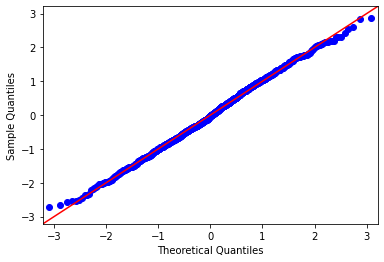

ShapiroResult(statistic=0.9973403811454773, pvalue=0.10011351853609085)

In [9]:

sm.qqplot((sums - np.mean(sums)) / np.std(sums), line ='45')
py.show()

In [10]:

stats.shapiro(sums)

ShapiroResult(statistic=0.9973403811454773, pvalue=0.10011351853609085)

In [13]:
np.sum(sums < np.sum(rl_rank)), sums, np.sum(rl_rank)

(995,
 array([ 6957.5,  5008.5,  9832. , 10680. ,  2844.5,  8384. ,  7049. ,
         7561.5,  6536.5, 10918.5,  6588. ,  8345.5,  8361.5,  7685.5,
         8636.5,  6907.5,  8173. ,  5802.5, 10902. ,  7474. ,  7414. ,
         8925.5,  9437.5,  6206.5,  4296.5,  7914.5, 10357. , 12107. ,
        11109.5,  8262.5,  5473. ,  9019.5,  6369.5,  6179.5, 10035. ,
         8340.5,  5195.5,  9639.5,  9037. ,  6935. , 10554. ,  7663.5,
         4801.5,  6757.5, 11697. ,  8761.5, 10446.5,  9528. ,  6165.5,
        10257. ,  9769.5,  9854.5,  7078.5,  6979. ,  9986. ,  7590. ,
        10278.5,  7013.5,  6792.5,  8599. , 11152. , 10342.5,  9894. ,
         9740. ,  8347. ,  6941. , 11552. ,  5780.5,  5989.5, 12835. ,
         7192. ,  6235.5,  7723.5,  4659.5, 12510.5,  7244.5,  7588.5,
         5061.5,  5467.5,  8264.5,  9448.5,  9159. ,  8027.5,  7151.5,
         8960.5, 10076. , 12614.5, 10550. ,  2723. , 11090. ,  4814. ,
         5770.5,  9042. ,  6410. ,  8186.5,  8761. ,  6860.5,  3723.5,


In [11]:
np.max(sums)

13994.5

In [14]:
# pvalue:
1-np.sum(sums < np.sum(rl_rank))/len(sums)

0.0050000000000000044

In [20]:
rl_sum = np.sum(rl_rank)
zscore = (rl_sum - np.mean(sums)) / np.std(sums)

1-stats.norm.cdf(zscore)

0.00788292052352002

# Sum of ranks analysis

Let's calculate a rank for a given threshold for each series for randomized datasets and let's what is the distribution of these values. Is it normal?

What is the prob. that the sum of ranks for RL dataset is larger than for randomized datasets? 

In [40]:
def calc_rank(vals, val):
    """
    Includes val in vals array sorts it and calculates rank for the val.
    """
    all_vals = np.append(vals, val)
    
    all_ranks = stats.rankdata(all_vals)
    return all_ranks[-1]

def calc_ranks(vals, val = []):
    """
    Calculated ranks and allows to include one more value. 
    """
    all_vals = np.append(vals, val)
    
    all_ranks = stats.rankdata(all_vals)
    if np.isscalar(val):
        return all_ranks[0:-1], all_ranks[-1]
    else:
        return all_ranks, []

def get_important_theta_values(thetas, bal_dens_rands, bal_dens = [], distances = [i/16 for i in range(0,16)]):
    """
    There are only 16 (17) distinct thetas. So we do not need all the values. 
    """
    pds = np.array([bal_dens[np.where(thetas >= distances[i])[0][0]] for i in range(0, len(distances))])
    rds = np.array([[bal_dens_rands[j][np.where(thetas >= distances[i])[0][0]] for i in range(0, len(distances))] for j in range(0, len(bal_dens_rands))])
    return pds, rds

def calc_ranks_thetas(bal_dens_rands, bal_dens = []):
    M, num_thetas = bal_dens_rands.shape
#     print(M); 
#     print(num_thetas)
    rl_rank = np.zeros(num_thetas)
    rand_ranks = np.zeros([num_thetas, M])
    
    for theta_ind in range(0, num_thetas):
        vals = [bal_dens_rands[i][theta_ind] for i in range(0, M)]
        if len(bal_dens) > 0:
            val = bal_dens[theta_ind]
        else:
            val = []
        
        rand_ranks[theta_ind], rl_rank[theta_ind] = calc_ranks(vals, val)
    return rand_ranks, rl_rank


In [41]:
test_all_agents_terms_together_bal_dens_rands

array([[0.022, 0.022, 0.022, ..., 1.   , 1.   , 1.   ],
       [0.007, 0.007, 0.007, ..., 1.   , 1.   , 1.   ],
       [0.029, 0.029, 0.029, ..., 1.   , 1.   , 1.   ],
       ...,
       [0.051, 0.051, 0.051, ..., 1.   , 1.   , 1.   ],
       [0.   , 0.   , 0.   , ..., 1.   , 1.   , 1.   ],
       [0.   , 0.   , 0.   , ..., 1.   , 1.   , 1.   ]])

In [42]:
distances = [i/16 for i in range(0,16)]
distances = test_all_agents_terms_together_thetas
pds = np.array([test_all_agents_terms_together_bal_dens[np.where(test_all_agents_terms_together_thetas >= distances[i])[0][0]] for i in range(0, len(distances))])
rds = np.array([[test_all_agents_terms_together_bal_dens_rands[j][np.where(test_all_agents_terms_together_thetas >= distances[i])[0][0]] for i in range(0, len(distances))] for j in range(0, len(test_all_agents_terms_together_bal_dens_rands))])
    

In [43]:
vals = [rds[i][0] for i in range(0, len(rds))]
val = pds[0]

calc_ranks(vals, val)

(array([ 745. ,  345.5,  863. ,  345.5,  745. ,  111.5,  111.5,  863. ,
         111.5,  745. ,  111.5,  568.5,  568.5,  568.5,  745. ,  568.5,
         863. ,  568.5,  568.5,  568.5,  345.5,  345.5,  568.5,  568.5,
         111.5,  111.5,  568.5,  863. ,  922.5,  111.5,  922.5,  568.5,
         345.5,  568.5,  568.5,  111.5,  863. ,  345.5,  745. ,  986. ,
         345.5,  111.5,  568.5,  745. ,  863. ,  345.5,  745. ,  863. ,
         972. ,  745. ,  111.5,  745. ,  111.5,  111.5,  863. ,  745. ,
         745. ,  745. ,  345.5,  745. ,  972. ,  345.5,  111.5,  568.5,
         111.5,  972. ,  345.5,  745. ,  111.5,  345.5,  111.5,  568.5,
         345.5,  345.5,  111.5,  111.5,  922.5,  568.5,  745. ,  922.5,
         345.5,  972. ,  568.5,  745. ,  345.5,  345.5,  111.5,  111.5,
         972. ,  111.5,  568.5,  111.5,  745. ,  863. ,  568.5,  986. ,
         568.5,  345.5,  111.5,  745. ,  568.5,  745. ,  345.5,  568.5,
         745. ,  111.5,  345.5,  111.5,  568.5,  345.5,  972. , 

In [44]:
rand_ranks, rl_rank = calc_ranks_thetas(rds, pds)

In [45]:
sums = np.sum(rand_ranks,0)

/home/pgorski/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


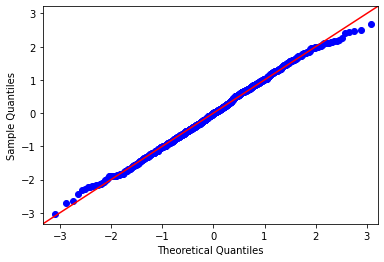

In [48]:

sm.qqplot((sums - np.mean(sums)) / np.std(sums), line ='45')
py.show()

In [49]:

stats.shapiro(sums)

ShapiroResult(statistic=0.9966814517974854, pvalue=0.033694904297590256)

In [50]:
np.sum(sums < np.sum(rl_rank)), sums, np.sum(rl_rank)

(989,
 array([29714. , 53218. , 46157. , 35194. , 36837. , 34458. , 39973. ,
        72460. , 48215.5, 70377.5, 58814. , 44603. , 46943. , 49452.5,
        60450.5, 44029.5, 74295.5, 38643. , 50260.5, 49440. , 55419.5,
        52189. , 42998. , 47573. , 35147. , 36079.5, 72686.5, 46513.5,
        68084.5, 35625.5, 59063. , 65848. , 46764. , 41702.5, 34476.5,
        38531.5, 41250. , 50557. , 64254. , 76342.5, 44092.5, 39677.5,
        56398.5, 48005. , 69785.5, 42115.5, 49518. , 57067.5, 61635.5,
        57905.5, 55892. , 72633. , 56755.5, 34258. , 44762.5, 60173.5,
        68047.5, 38504. , 49318.5, 50766.5, 74426.5, 46531. , 39696. ,
        62664.5, 63908.5, 70700. , 42759.5, 61266. , 44658.5, 30547. ,
        36921.5, 42689. , 63548. , 44137.5, 36827.5, 50904.5, 58782.5,
        69575. , 46482. , 54308.5, 38583.5, 67200. , 45490.5, 61337.5,
        37555. , 54304. , 30287. , 34588. , 65176. , 52233.5, 60767. ,
        47985. , 39759.5, 59701. , 47498. , 56590.5, 45567. , 39500.5,


In [51]:
np.max(sums)

82951.0

In [52]:
# pvalue:
1-np.sum(sums < np.sum(rl_rank))/len(sums)

0.01100000000000001

In [53]:
rl_sum = np.sum(rl_rank)
zscore = (rl_sum - np.mean(sums)) / np.std(sums)

1-stats.norm.cdf(zscore)

0.016526825495757902